Especialização em Inteligência Artificial<br>
Lista de Exercícios 03 de Análise e Previsão de Séries Temporais<br>
Prof. Carlos Severiano<br>
Aluno: Fernando dos Santos Alves Fernandes

Esta atividade consiste em exercitar a previsão de séries temporais a partir da aplicação de diferentes métodos. Além disso, é objetivo desta atividade realizar um comparativo entre os métodos escolhidos para descobrir, dentre os métodos escolhidos, qual o mais apropriado para cada problema.

Serão realizados 4 comparativos utilizando as bases de dados anexadas a esta atividade (*Electric_Production.csv*, *shampoo_sales.csv*, *airline-passengers.csv* e *facebook-historical-stock-price.csv*).

Para cada base de dados, os seguintes passos devem ser realizados:

1. Escolher 3 modelos, cada um pertencente a um dos grupos abaixo:
    <br>a.	Um modelo simples
    <br>b.	Um modelo de suavização exponencial
    <br>c.	Um modelo ARIMA

2. Separar a base de dados em treinamento e teste, na proporção 80% para 20%.

3. Aplicar cada método de previsão aos dados, usando validação cruzada.

4. Medir o desempenho de cada modelo a partir de 3 métricas: MAE, RMSE e MAPE.

5. Ilustrar em um gráfico o desempenho do método que se saiu melhor nos experimentos de cada base de dados.

In [1]:
# Importando das bibliotecas utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from datetime import datetime
import locale
from random import gauss, randrange, random

import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.regression.linear_model as rlm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from math import sqrt

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 15, 6
locale.setlocale(locale.LC_ALL, '')
formato = "%m/%d/%Y"

### Base 1

In [2]:
# Carregando os dados da série temporal. Base: 'Electric_Production.csv'.

electric_production = pd.read_csv('datasets/Electric_Production.csv', index_col='DATE')

In [3]:
electric_production.describe()

,IPG2211A2N
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


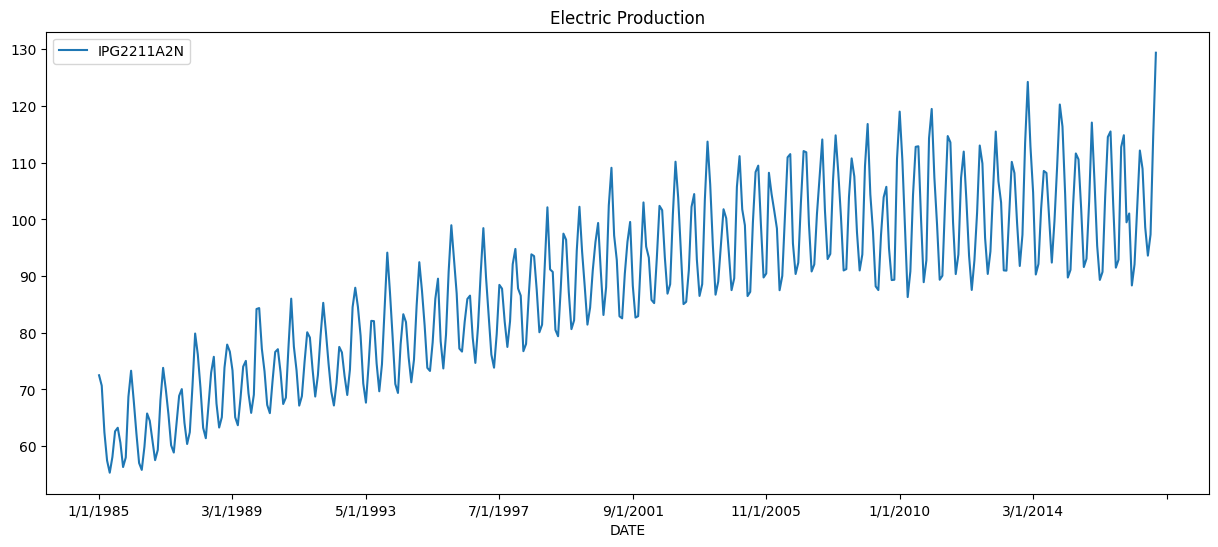

In [4]:
electric_production.plot(title='Electric Production', legend='Production')
plt.legend(loc='best')
plt.show()

In [5]:
electric_production.head()

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


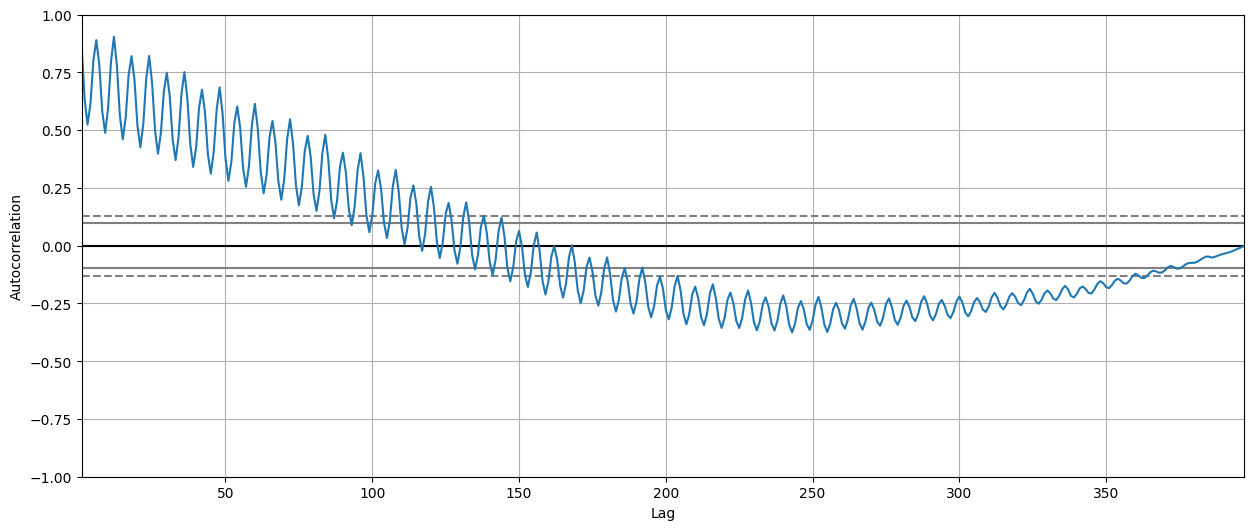

In [6]:
autocorrelation_plot(electric_production)
plt.show()

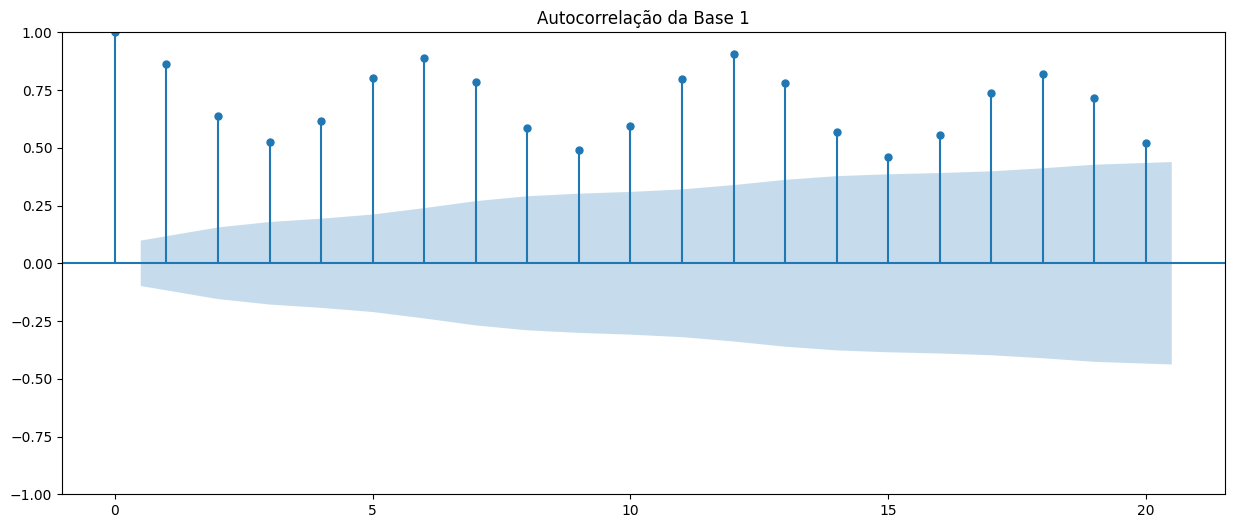

In [7]:
smt.graphics.plot_acf(electric_production, lags=20, alpha=0.05, title="Autocorrelação da Base 1")
plt.show()

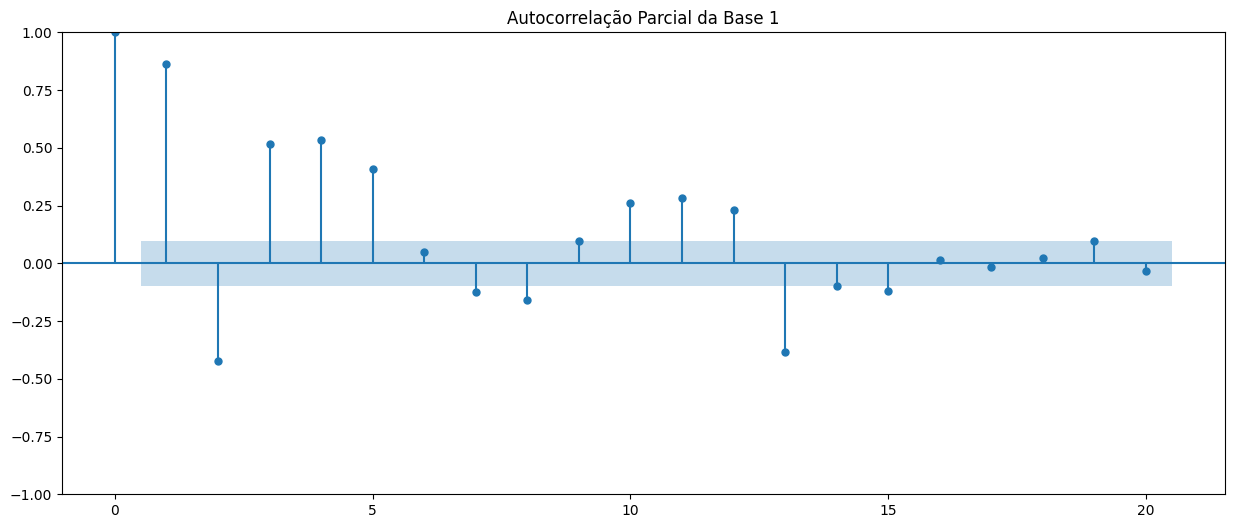

In [8]:
smt.graphics.plot_pacf(electric_production, lags=20, alpha=0.05, title="Autocorrelação Parcial da Base 1")
plt.show()

#### Base 1 - Modelo Simples

In [9]:
# 1. Escolhendo um modelo simples: Método da média dos dados históricos.

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	yhat = np.mean(history)
	predictions.append(yhat)
	obs = test[t]
	# history.append(np.double(yhat))
	history.append(np.double(obs))
	history = history[-(size):]
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=85.346568, osbervado=102.820400
previsão=85.442200, osbervado=114.706800
previsão=85.581111, osbervado=113.595800
previsão=85.742453, osbervado=99.471200
previsão=85.874945, osbervado=90.356600
previsão=85.985486, osbervado=93.809500
previsão=86.098164, osbervado=107.331200
previsão=86.239209, osbervado=111.964600
previsão=86.392887, osbervado=103.367900
previsão=86.527850, osbervado=93.577200
previsão=86.645395, osbervado=87.556600
previsão=86.738632, osbervado=92.760300
previsão=86.814486, osbervado=101.140000
previsão=86.902292, osbervado=113.035700
previsão=87.044402, osbervado=109.860100
previsão=87.194679, osbervado=96.743100
previsão=87.319948, osbervado=90.380500
previsão=87.428991, osbervado=94.341700
previsão=87.537639, osbervado=105.272200
previsão=87.662266, osbervado=115.501000
previsão=87.823210, osbervado=106.734000
previsão=87.967480, osbervado=102.994800
previsão=88.110895, osbervado=91.009200
previsão=88.210792, osbervado=90.963400
previsão=88.282805, osberva

Test MAE: 13.116
Test RMSE: 16.103
Test MAPE: 0.121


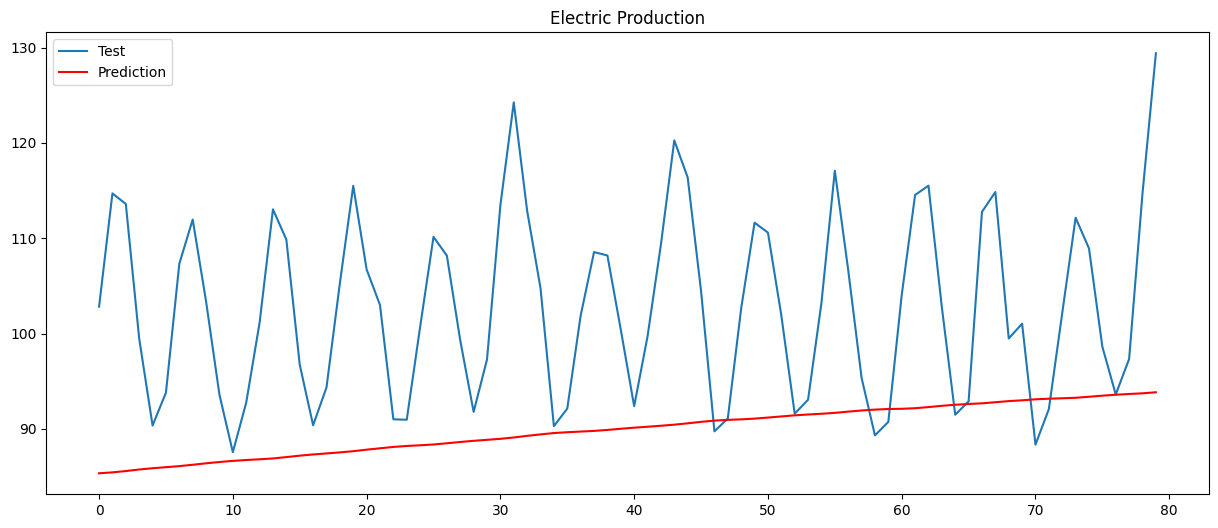

In [10]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Electric Production")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

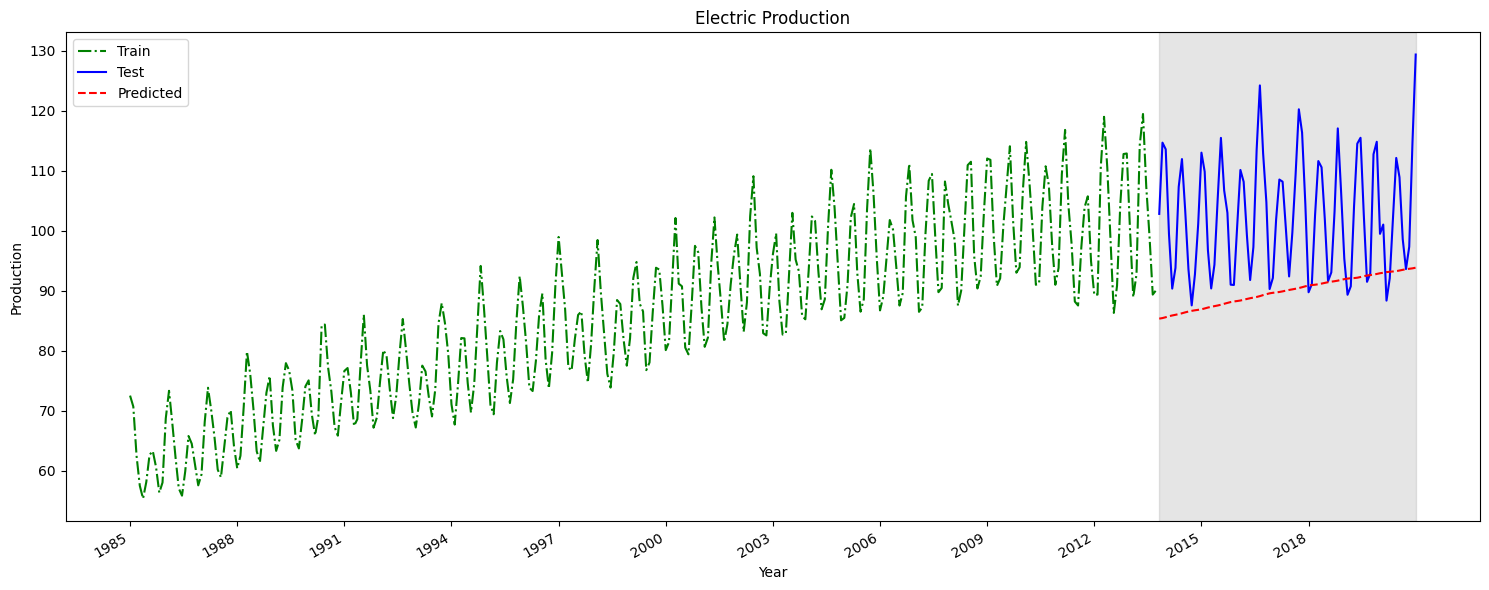

In [11]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(electric_production.index[0:size], train, 'g-.', label='Train')
ax.plot(electric_production.index[size:len(X)], test, 'b-', label='Test')
ax.plot(electric_production.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Electric Production")
plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 1 - Modelo de Suavização Exponencial

In [12]:
# 1. b) Escolhendo um modelo de suavização exponencial: Suavização Exponencial Simples.

model = SimpleExpSmoothing(electric_production)
model_fit = model.fit()

print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                       SimpleExpSmoothing Model Results                       
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:             SimpleExpSmoothing   SSE                          23821.620
Optimized:                       True   AIC                           1629.482
Trend:                           None   BIC                           1637.450
Seasonal:                        None   AICC                          1629.584
Seasonal Periods:                None   Date:                 ter, 07 nov 2023
Box-Cox:                        False   Time:                         19:44:37
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              72.505200                

In [13]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

init = size

for t in range(len(test)):
	model = SimpleExpSmoothing(electric_production)
	model_fit = model.fit()
	yhat = model_fit.predict(init, init)
	predictions.append(yhat[0])
	obs = test[t]
	history.append(obs)
	init = init + 1
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=90.069800, osbervado=102.820400
previsão=102.820400, osbervado=114.706800
previsão=114.706800, osbervado=113.595800
previsão=113.595800, osbervado=99.471200
previsão=99.471200, osbervado=90.356600
previsão=90.356600, osbervado=93.809500
previsão=93.809500, osbervado=107.331200
previsão=107.331200, osbervado=111.964600
previsão=111.964600, osbervado=103.367900
previsão=103.367900, osbervado=93.577200
previsão=93.577200, osbervado=87.556600
previsão=87.556600, osbervado=92.760300
previsão=92.760300, osbervado=101.140000
previsão=101.140000, osbervado=113.035700
previsão=113.035700, osbervado=109.860100
previsão=109.860100, osbervado=96.743100
previsão=96.743100, osbervado=90.380500
previsão=90.380500, osbervado=94.341700
previsão=94.341700, osbervado=105.272200
previsão=105.272200, osbervado=115.501000
previsão=115.501000, osbervado=106.734000
previsão=106.734000, osbervado=102.994800
previsão=102.994800, osbervado=91.009200
previsão=91.009200, osbervado=90.963400
previsão=90.96

Test MAE: 8.326
Test RMSE: 9.506
Test MAPE: 0.081


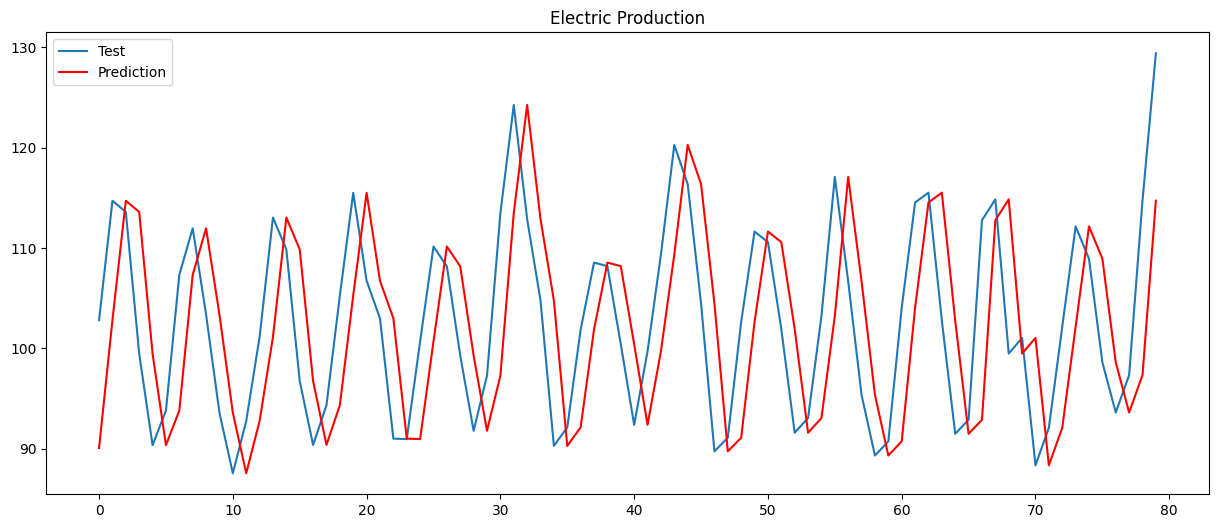

In [14]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Electric Production")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

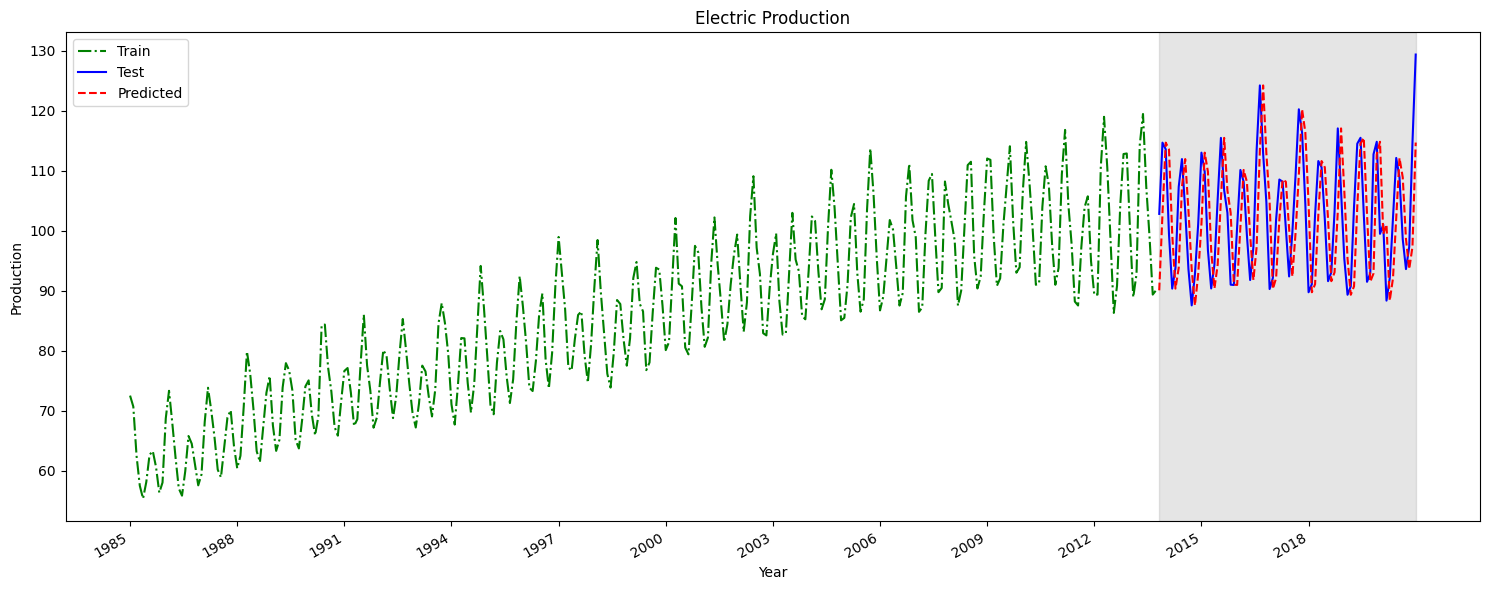

In [15]:
# 5 Ilustrando graficamente o desempenho do modelo de suavização exponencial simples.

fig, ax = plt.subplots()

ax.plot(electric_production.index[0:size], train, 'g-.', label='Train')
ax.plot(electric_production.index[size:len(X)], test, 'b-', label='Test')
ax.plot(electric_production.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Electric Production")
plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 1 - Modelo ARIMA

In [16]:
# 1. c) Escolhendo um modelo ARIMA.

model = ARIMA(electric_production, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = electric_production.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                               SARIMAX Results                                
Dep. Variable:             IPG2211A2N   No. Observations:                  397
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1100.930
Date:                ter, 07 nov 2023   AIC                           2213.861
Time:                        19:44:39   BIC                           2237.749
Sample:                    01-01-1985   HQIC                          2223.325
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0650      0.044     -1.488      0.137      -0.151       0.021
ar.L2         -0.4828      0.049     -9.859      0.000      -0.579      -0.387
ar.L3         -0.5190      0.047    -11.102      0.0

In [17]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=104.009012, osbervado=102.820400
previsão=111.117402, osbervado=114.706800
previsão=112.571623, osbervado=113.595800
previsão=101.893588, osbervado=99.471200
previsão=88.939704, osbervado=90.356600
previsão=92.013485, osbervado=93.809500
previsão=104.810368, osbervado=107.331200
previsão=116.006931, osbervado=111.964600
previsão=108.411492, osbervado=103.367900
previsão=93.786685, osbervado=93.577200
previsão=89.691838, osbervado=87.556600
previsão=93.934071, osbervado=92.760300
previsão=103.876745, osbervado=101.140000
previsão=106.075859, osbervado=113.035700
previsão=109.228744, osbervado=109.860100
previsão=98.075993, osbervado=96.743100
previsão=88.849359, osbervado=90.380500
previsão=92.792831, osbervado=94.341700
previsão=104.419795, osbervado=105.272200
previsão=112.093835, osbervado=115.501000
previsão=111.477346, osbervado=106.734000
previsão=95.250669, osbervado=102.994800
previsão=97.225627, osbervado=91.009200
previsão=92.541658, osbervado=90.963400
previsão=101.9

Test MAE: 3.466
Test RMSE: 4.609
Test MAPE: 0.033


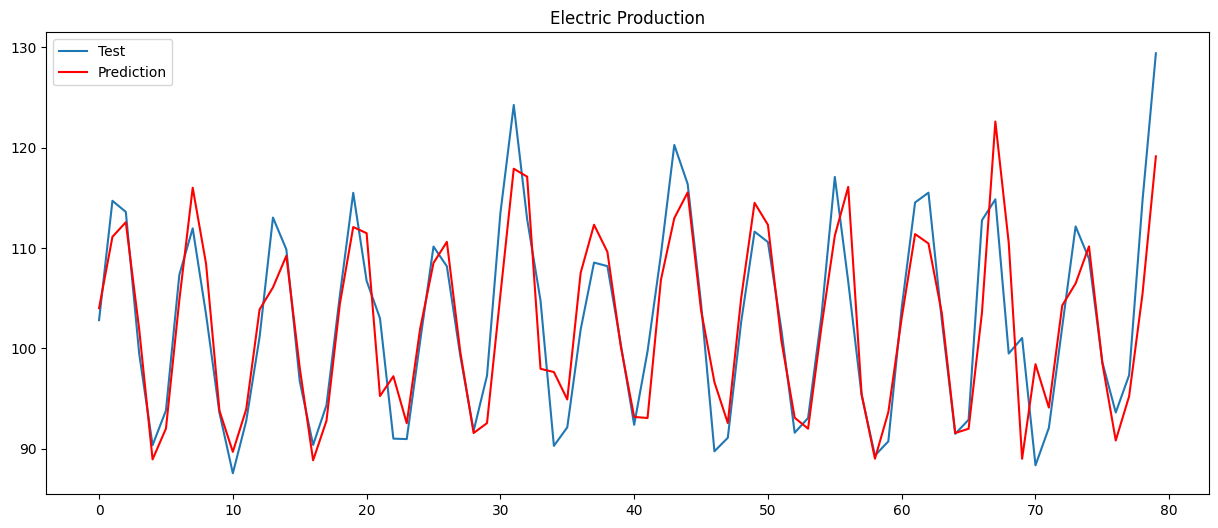

In [18]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Electric Production")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

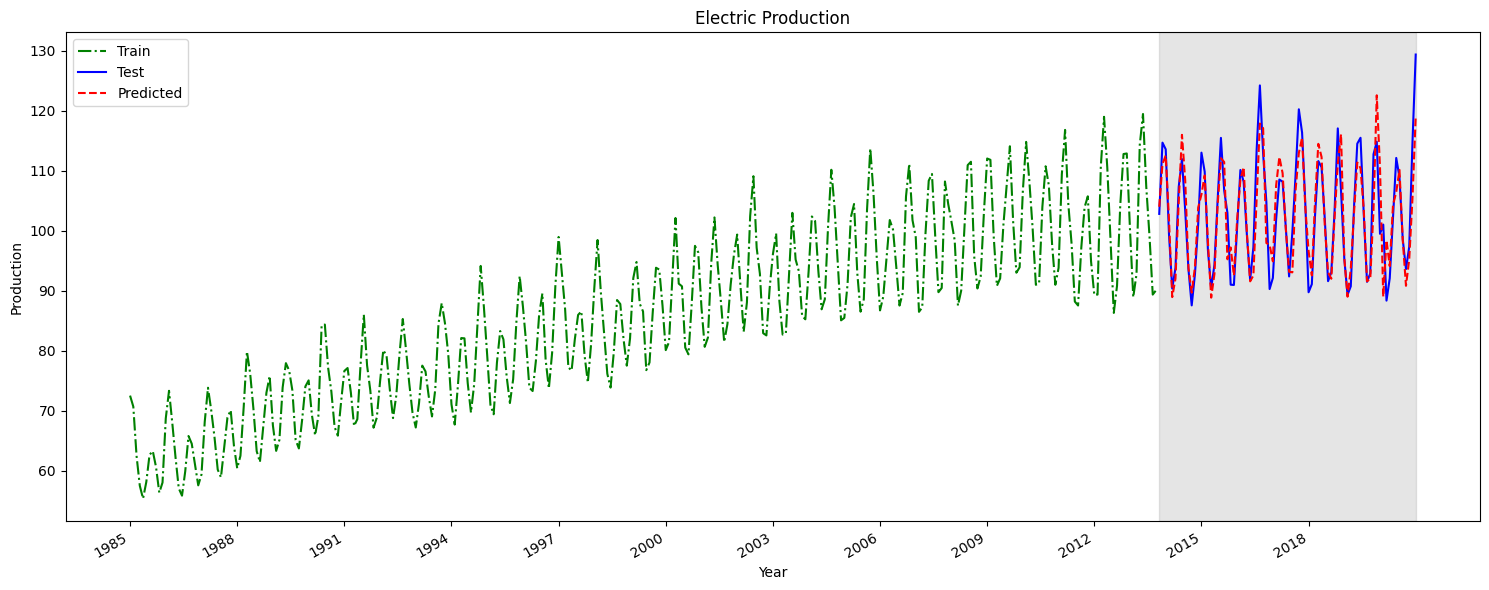

In [19]:
# 5 Ilustrando graficamente o desempenho do modelo ARIMA.

fig, ax = plt.subplots()

ax.plot(electric_production.index[0:size], train, 'g-.', label='Train')
ax.plot(electric_production.index[size:len(X)], test, 'b-', label='Test')
ax.plot(electric_production.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Electric Production")
plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])

fig.autofmt_xdate()
plt.tight_layout()

### Base 2

In [20]:
# Carregando os dados da série temporal. Base: 'shampoo_sales.csv'.

shampoo_sales = pd.read_csv('datasets/shampoo_sales.csv', index_col='Month')
#shampoo_sales.index = shampoo_sales.index.to_period('M')

In [21]:
shampoo_sales.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [22]:
shampoo_sales.size

36

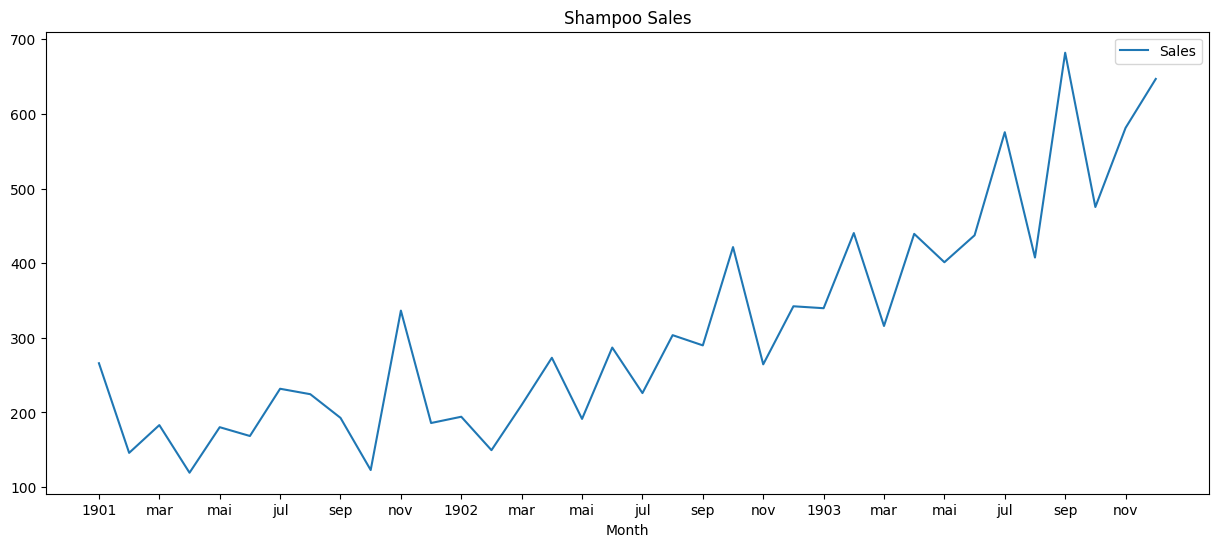

In [23]:
shampoo_sales.plot(title='Shampoo Sales', legend='Sales')
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])
plt.legend(loc='best')
plt.show()

In [24]:
shampoo_sales.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


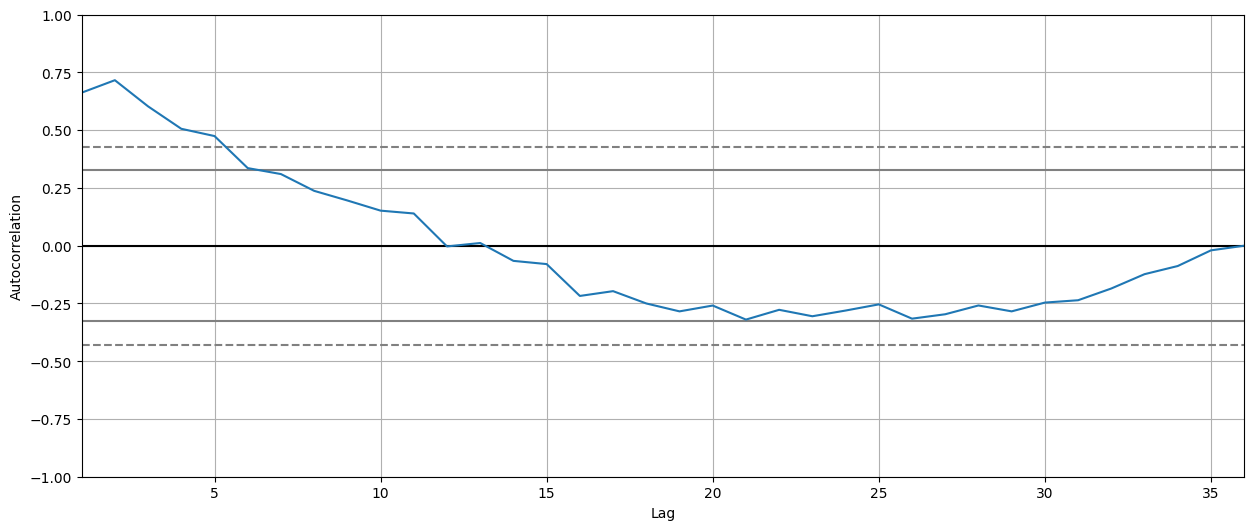

In [25]:
autocorrelation_plot(shampoo_sales)
plt.show()

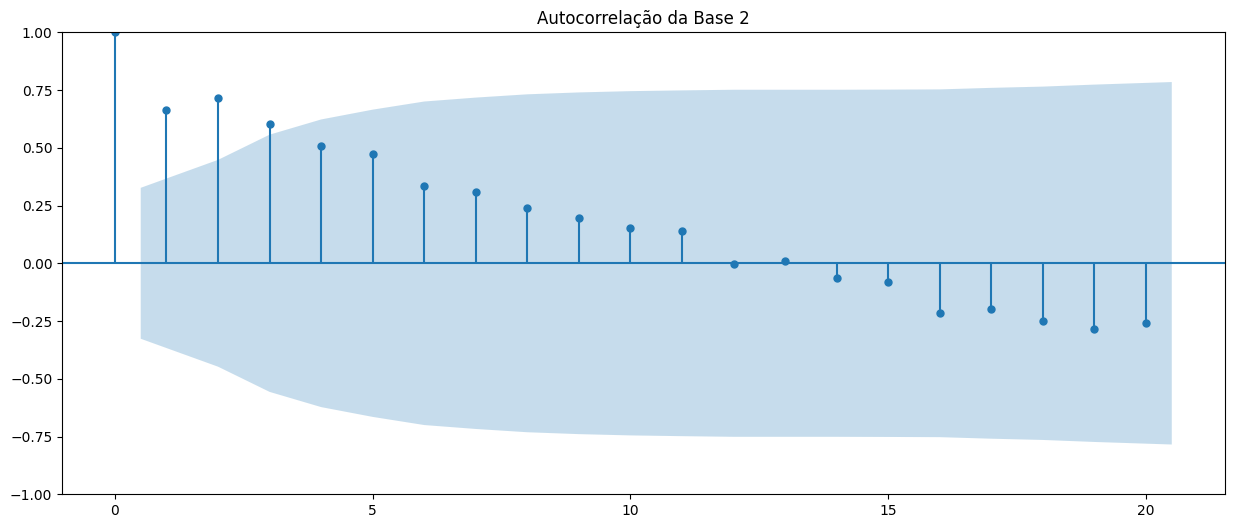

In [26]:
smt.graphics.plot_acf(shampoo_sales, lags=20, alpha=0.05, title="Autocorrelação da Base 2")
plt.show()

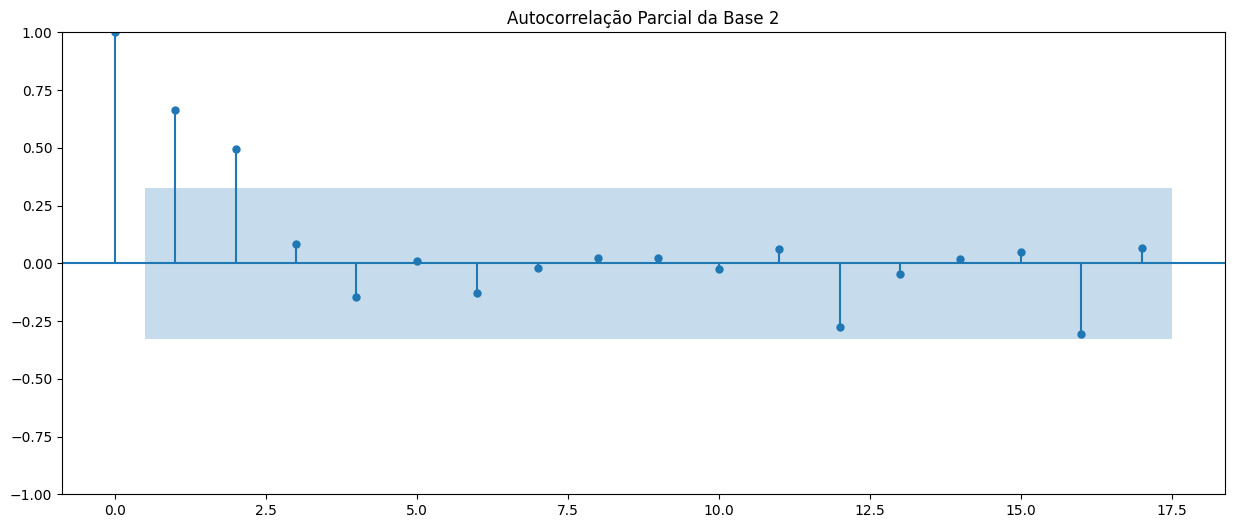

In [27]:
smt.graphics.plot_pacf(shampoo_sales, lags=17, alpha=0.05, title="Autocorrelação Parcial da Base 2")
plt.show()

#### Base 2 - Modelo Simples

In [28]:
# 1. Escolhendo um modelo simples: Método da média dos dados históricos.

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = shampoo_sales.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	yhat = np.mean(history)
	predictions.append(yhat)
	obs = test[t]
	# history.append(np.double(yhat))
	history.append(np.double(obs))
	history = history[-(size):]
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=251.653571, osbervado=401.300000
previsão=256.485714, osbervado=437.400000
previsão=266.896429, osbervado=575.500000
previsão=280.910714, osbervado=407.600000
previsão=291.207143, osbervado=682.000000
previsão=309.125000, osbervado=475.300000
previsão=320.082143, osbervado=581.300000
previsão=332.564286, osbervado=646.900000


Test MAE: 237.297
Test RMSE: 253.423
Test MAPE: 0.436


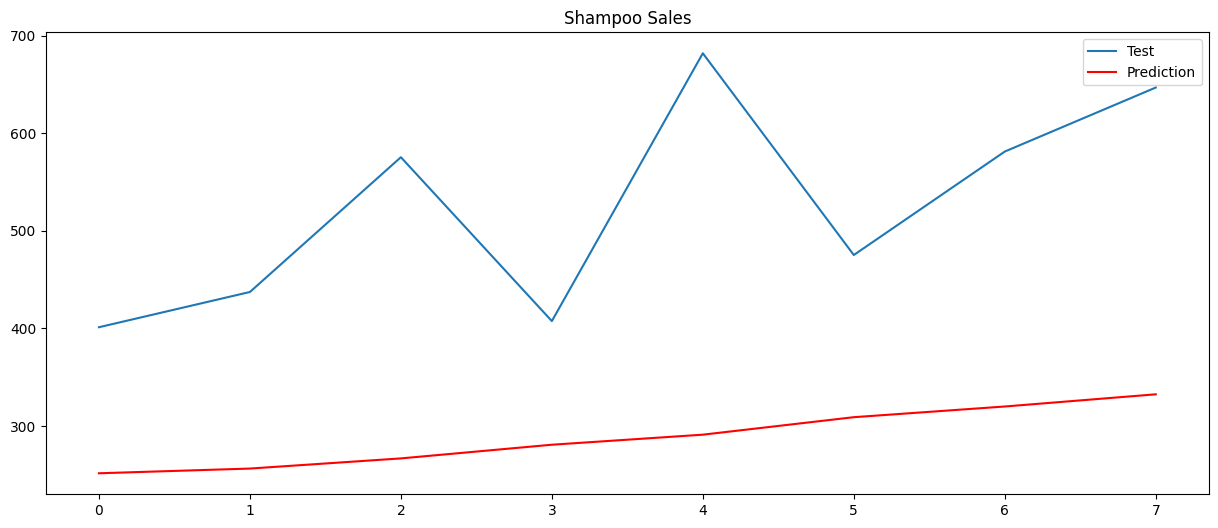

In [29]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Shampoo Sales")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

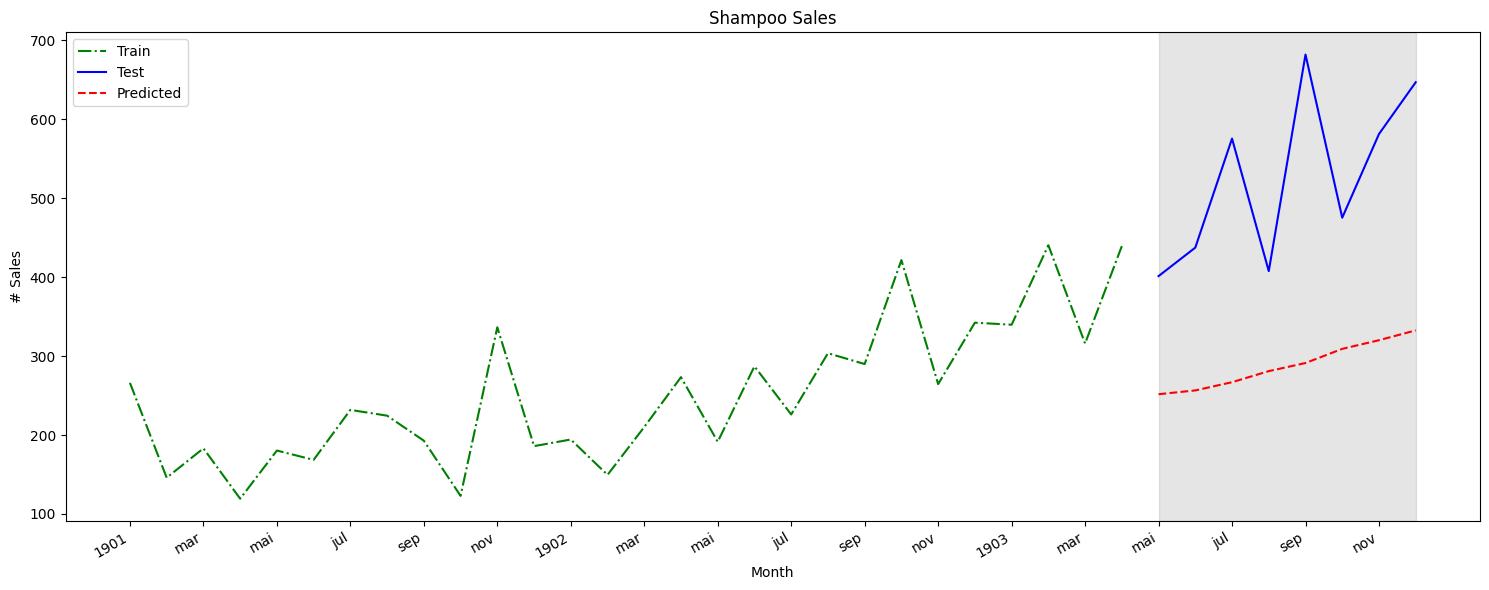

In [30]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(28, 35, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 2 - Modelo de Suavização Exponencial

In [31]:
# 1. b) Escolhendo um modelo de suavização exponencial: Suavização Exponencial Simples.

model = SimpleExpSmoothing(shampoo_sales)
model_fit = model.fit()

print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = shampoo_sales.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Sales   No. Observations:                   36
Model:             SimpleExpSmoothing   SSE                         247635.134
Optimized:                       True   AIC                            322.103
Trend:                           None   BIC                            325.270
Seasonal:                        None   AICC                           323.393
Seasonal Periods:                None   Date:                 ter, 07 nov 2023
Box-Cox:                        False   Time:                         19:44:55
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.4168588                alpha                 True
initial_level              266.00000                

In [32]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

init = size

for t in range(len(test)):
	model = SimpleExpSmoothing(shampoo_sales)
	model_fit = model.fit()
	yhat = model_fit.predict(init, init)
	predictions.append(yhat[0])
	obs = test[t]
	history.append(obs)
	init = init + 1
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=387.577862, osbervado=401.300000
previsão=393.298056, osbervado=437.400000
previsão=411.682341, osbervado=575.500000
previsão=479.971180, osbervado=407.600000
previsão=449.802614, osbervado=682.000000
previsão=546.596146, osbervado=475.300000
previsão=516.875718, osbervado=581.300000
previsão=543.731549, osbervado=646.900000


Test MAE: 95.637
Test RMSE: 116.190
Test MAPE: 0.170


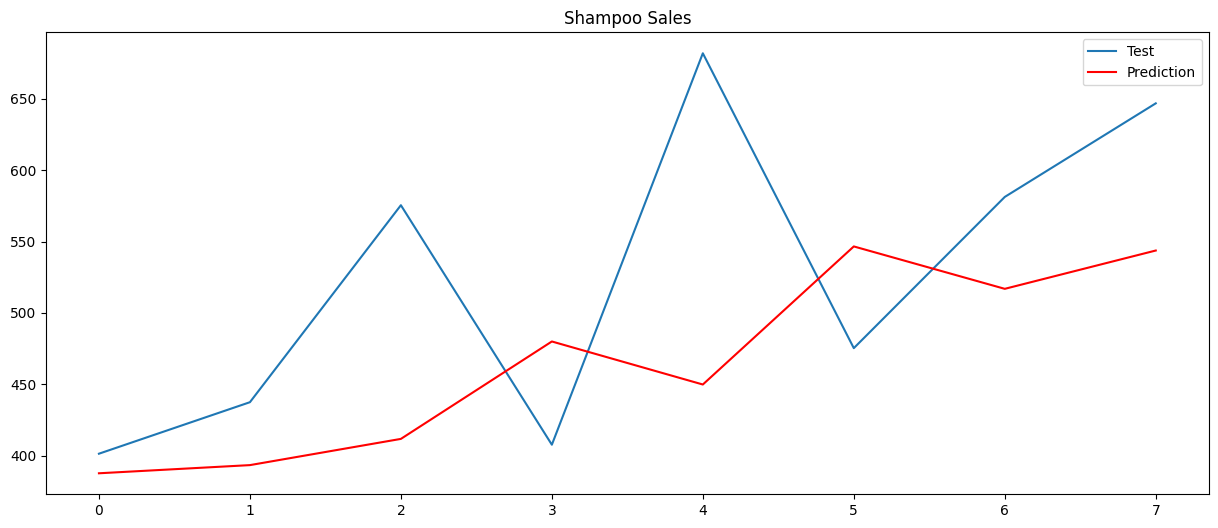

In [33]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Shampoo Sales")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

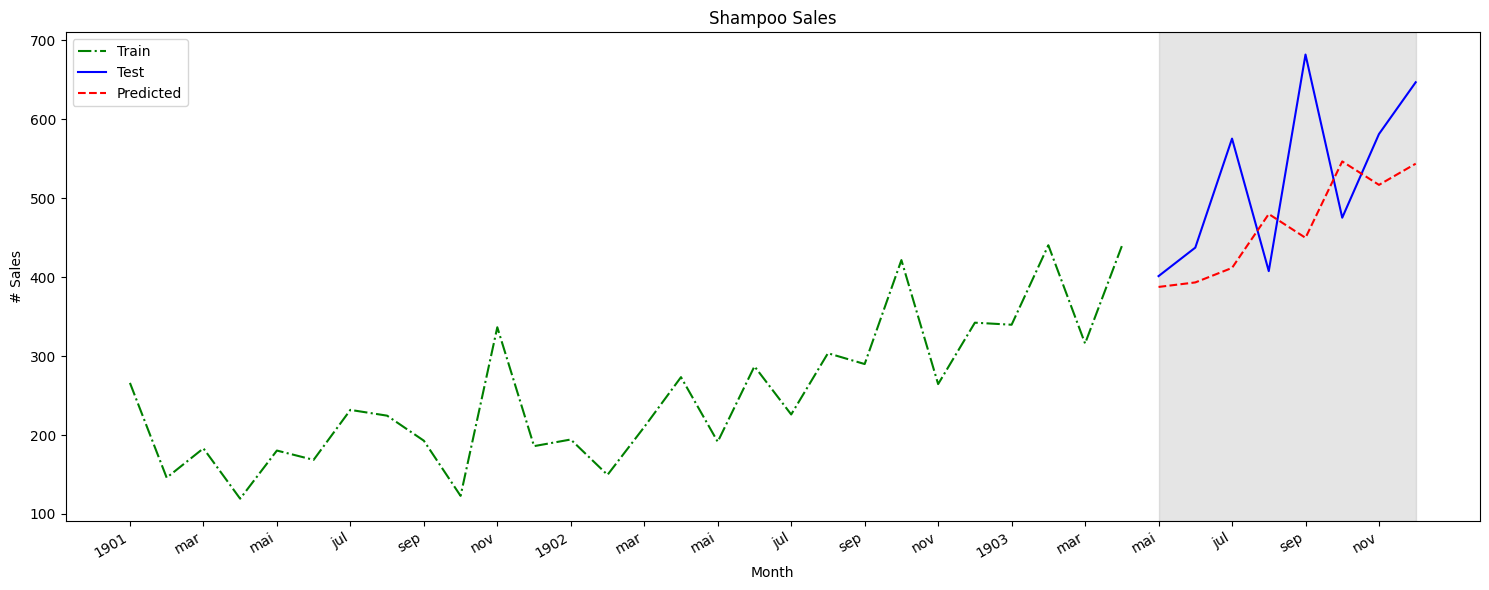

In [34]:
# 5 Ilustrando graficamente o desempenho do modelo de suavização exponencial simples.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(28, 35, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 2 - Modelo ARIMA

In [35]:
# 1. c) Escolhendo um modelo ARIMA.

model = ARIMA(shampoo_sales, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = shampoo_sales.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                ter, 07 nov 2023   AIC                            408.969
Time:                        19:44:56   BIC                            418.301
Sample:                             0   HQIC                           412.191
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

In [36]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=357.645324, osbervado=401.300000
previsão=443.047835, osbervado=437.400000
previsão=378.365674, osbervado=575.500000
previsão=459.415020, osbervado=407.600000
previsão=526.890876, osbervado=682.000000
previsão=457.231274, osbervado=475.300000
previsão=672.914944, osbervado=581.300000
previsão=531.541449, osbervado=646.900000


Test MAE: 84.800
Test RMSE: 105.813
Test MAPE: 0.149


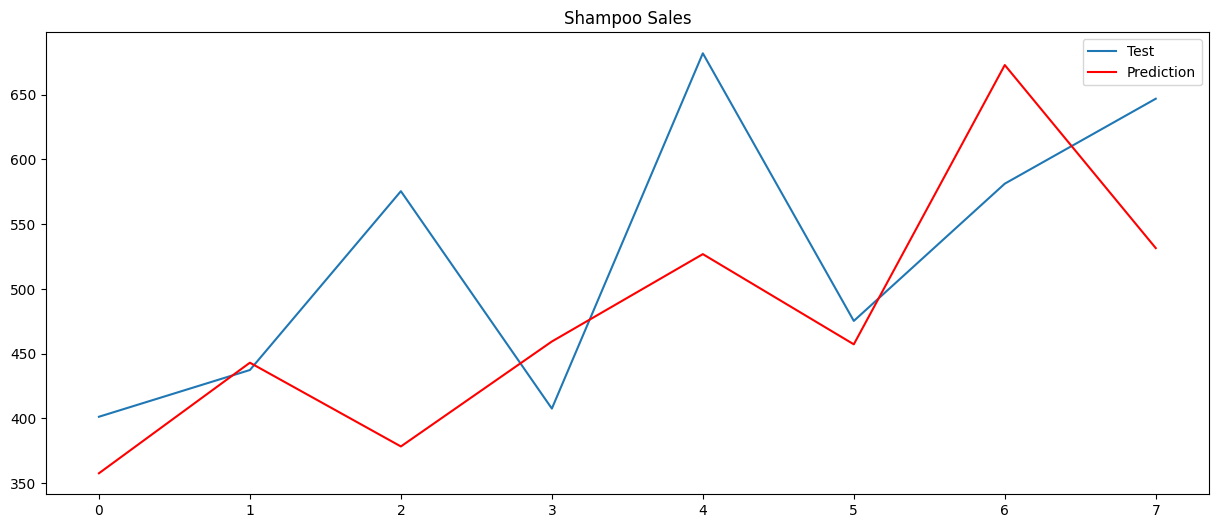

In [37]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Shampoo Sales")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

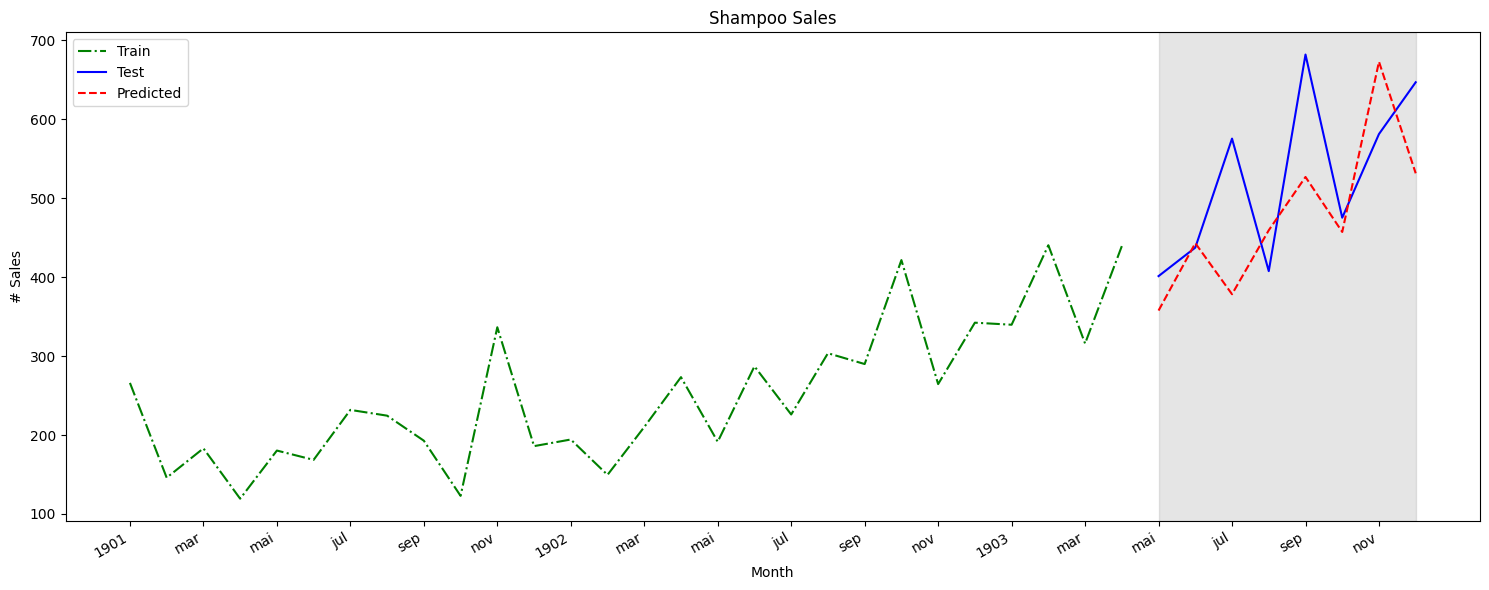

In [38]:
# 5 Ilustrando graficamente o desempenho do modelo ARIMA.

fig, ax = plt.subplots()

ax.plot(shampoo_sales.index[0:size], train, 'g-.', label='Train')
ax.plot(shampoo_sales.index[size:len(X)], test, 'b-', label='Test')
ax.plot(shampoo_sales.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Month')
ax.set_ylabel('# Sales')
ax.axvspan(28, 35, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Shampoo Sales")
plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

### Base 3

In [39]:
airline_passengers = pd.read_csv('datasets/airline-passengers.csv', parse_dates=True, index_col='Month')

In [40]:
airline_passengers.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


[]

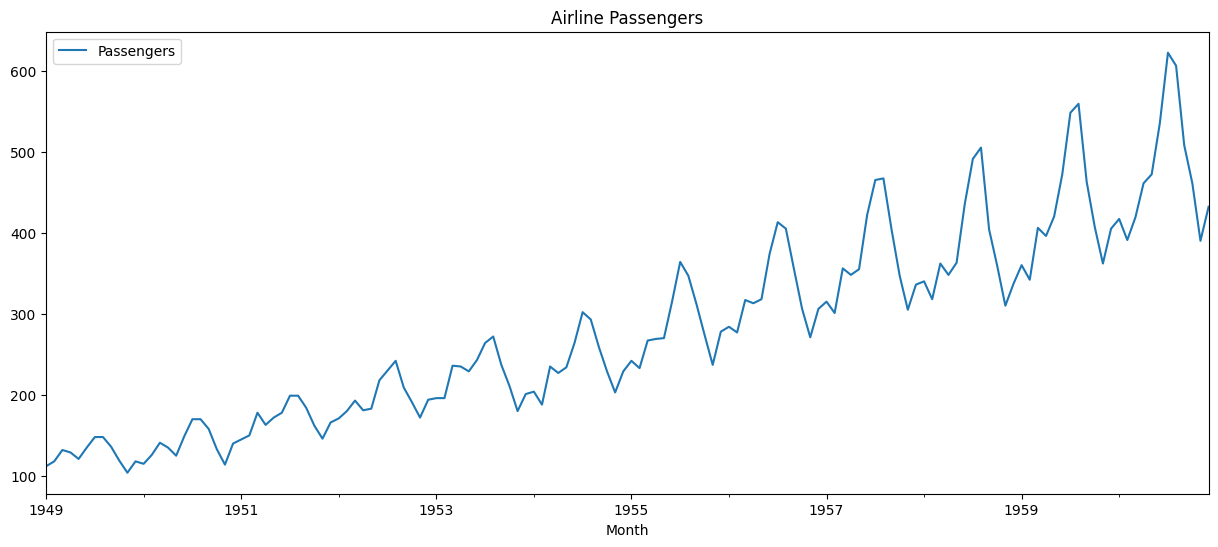

In [41]:
airline_passengers.plot(title='Airline Passengers')
plt.legend(loc='best')
plt.plot()

In [42]:
airline_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


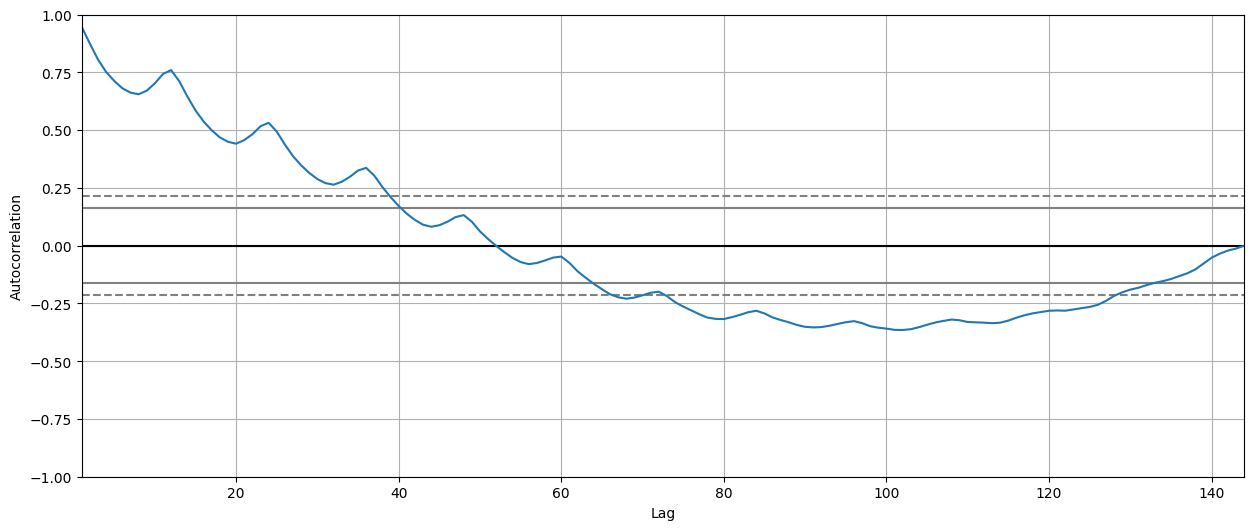

In [43]:
autocorrelation_plot(airline_passengers)
plt.show()

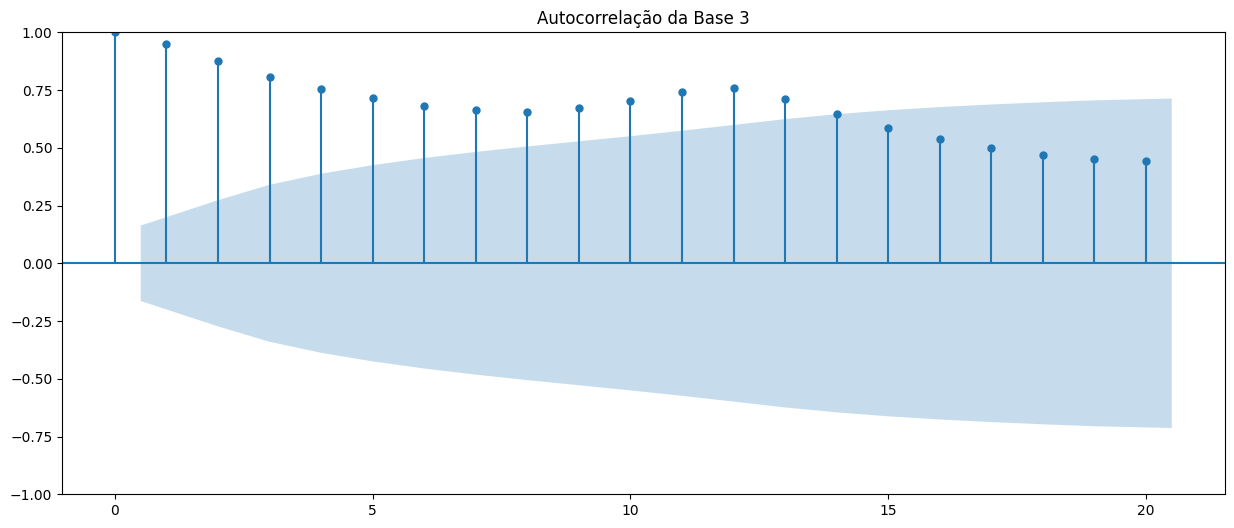

In [44]:
smt.graphics.plot_acf(airline_passengers, lags=20, alpha=0.05, title="Autocorrelação da Base 3")
plt.show()

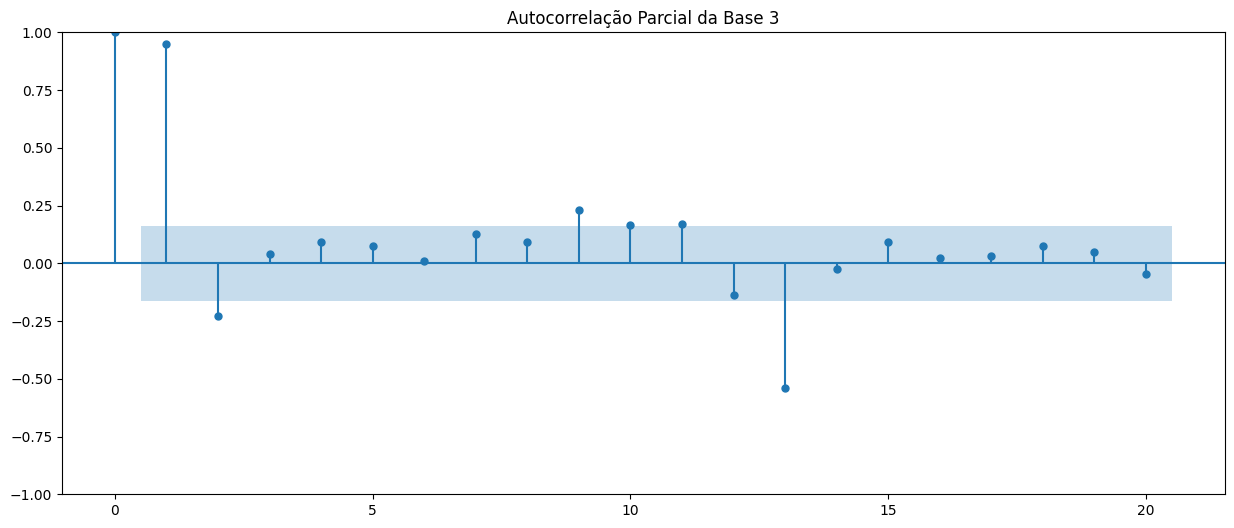

In [45]:
smt.graphics.plot_pacf(airline_passengers, lags=20, alpha=0.05, title="Autocorrelação Parcial da Base 3")
plt.show()

#### Base 3 - Modelo Simples

In [46]:
# 1. Escolhendo um modelo simples: Método da média dos dados históricos.

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = airline_passengers.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	yhat = np.mean(history)
	predictions.append(yhat)
	obs = test[t]
	# history.append(np.double(yhat))
	history.append(np.double(obs))
	history = history[-(size):]
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=239.947826, osbervado=505.000000
previsão=243.365217, osbervado=404.000000
previsão=245.852174, osbervado=359.000000
previsão=247.826087, osbervado=310.000000
previsão=249.400000, osbervado=337.000000
previsão=251.278261, osbervado=360.000000
previsão=253.234783, osbervado=342.000000
previsão=254.921739, osbervado=406.000000
previsão=257.165217, osbervado=396.000000
previsão=259.426087, osbervado=420.000000
previsão=262.043478, osbervado=472.000000
previsão=265.243478, osbervado=548.000000
previsão=268.982609, osbervado=559.000000
previsão=272.843478, osbervado=463.000000
previsão=275.773913, osbervado=407.000000
previsão=278.086957, osbervado=362.000000
previsão=280.060870, osbervado=405.000000
previsão=282.495652, osbervado=417.000000
previsão=284.826087, osbervado=391.000000
previsão=286.747826, osbervado=419.000000
previsão=288.913043, osbervado=461.000000
previsão=291.547826, osbervado=472.000000
previsão=294.495652, osbervado=535.000000
previsão=298.156522, osbervado=622

Test MAE: 165.254
Test RMSE: 180.016
Test MAPE: 0.360


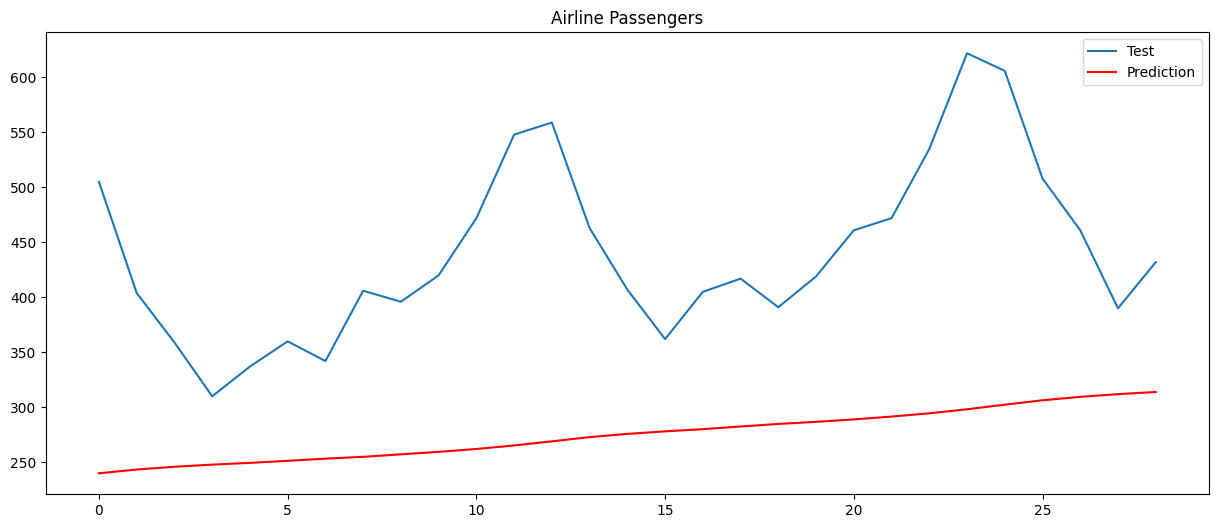

In [47]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

# smape = MeanAbsolutePercentageError(symmetric=True)
# print('Test MAPE: %.3f' % smape(test, predictions))

plt.title("Airline Passengers")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

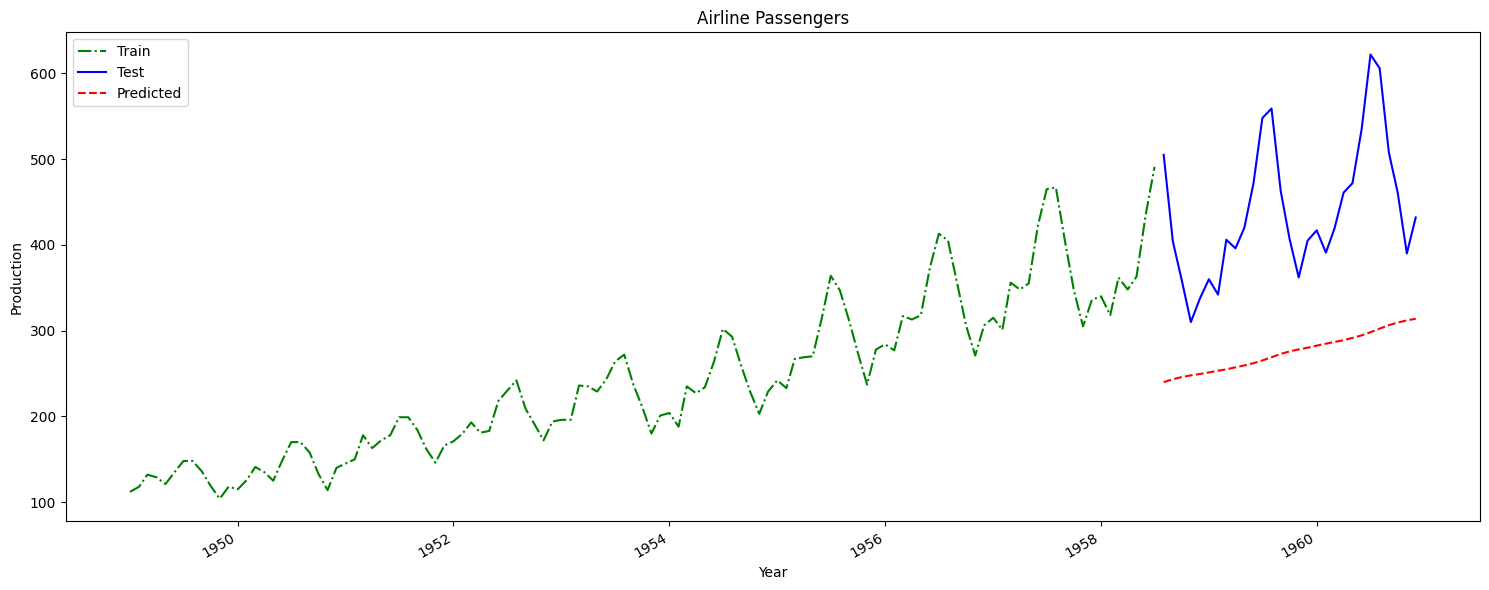

In [48]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(airline_passengers.index[0:size], train, 'g-.', label='Train')
ax.plot(airline_passengers.index[size:len(X)], test, 'b-', label='Test')
ax.plot(airline_passengers.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year') # Conferir!
ax.set_ylabel('Production') # Conferir!
#ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Airline Passengers")

#plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018]) # Conferir!!!
# plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 3 - Modelo de Suavização Exponencial

In [49]:
# 1. b) Escolhendo um modelo de suavização exponencial: Suavização Exponencial Simples.

model = SimpleExpSmoothing(airline_passengers)
model_fit = model.fit()

print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = airline_passengers.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                       SimpleExpSmoothing Model Results                       
Dep. Variable:             Passengers   No. Observations:                  144
Model:             SimpleExpSmoothing   SSE                         163003.353
Optimized:                       True   AIC                           1016.567
Trend:                           None   BIC                           1022.506
Seasonal:                        None   AICC                          1016.854
Seasonal Periods:                None   Date:                 ter, 07 nov 2023
Box-Cox:                        False   Time:                         19:45:00
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
initial_level              112.00000                

In [50]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

init = size

for t in range(len(test)):
	model = SimpleExpSmoothing(airline_passengers)
	model_fit = model.fit()
	yhat = model_fit.predict(init, init)
	predictions.append(yhat[0])
	obs = test[t]
	history.append(obs)
	init = init + 1
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=490.718198, osbervado=505.000000
previsão=504.928591, osbervado=404.000000
previsão=404.504643, osbervado=359.000000
previsão=359.227523, osbervado=310.000000
previsão=310.246138, osbervado=337.000000
previsão=336.866231, osbervado=360.000000
previsão=359.884331, osbervado=342.000000
previsão=342.089422, osbervado=406.000000
previsão=405.680447, osbervado=396.000000
previsão=396.048402, osbervado=420.000000
previsão=419.880242, osbervado=472.000000
previsão=471.739401, osbervado=548.000000
previsão=547.618697, osbervado=559.000000
previsão=558.943093, osbervado=463.000000
previsão=463.479715, osbervado=407.000000
previsão=407.282399, osbervado=362.000000
previsão=362.226412, osbervado=405.000000
previsão=404.786132, osbervado=417.000000
previsão=416.938931, osbervado=391.000000
previsão=391.129695, osbervado=419.000000
previsão=418.860648, osbervado=461.000000
previsão=460.789303, osbervado=472.000000
previsão=471.943947, osbervado=535.000000
previsão=534.684720, osbervado=622

Test MAE: 44.802
Test RMSE: 52.578
Test MAPE: 0.103


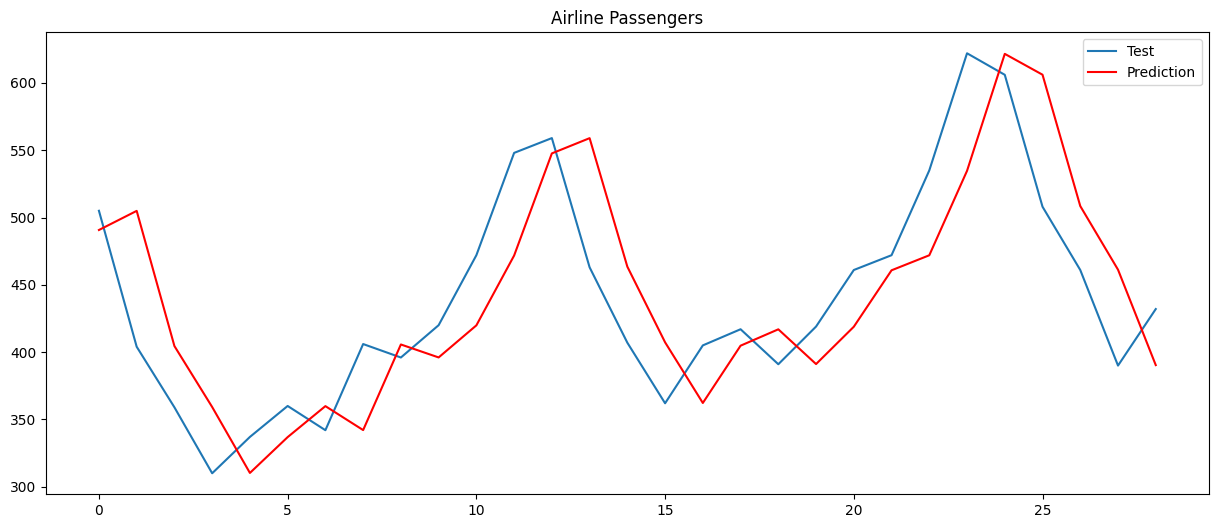

In [51]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Airline Passengers")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

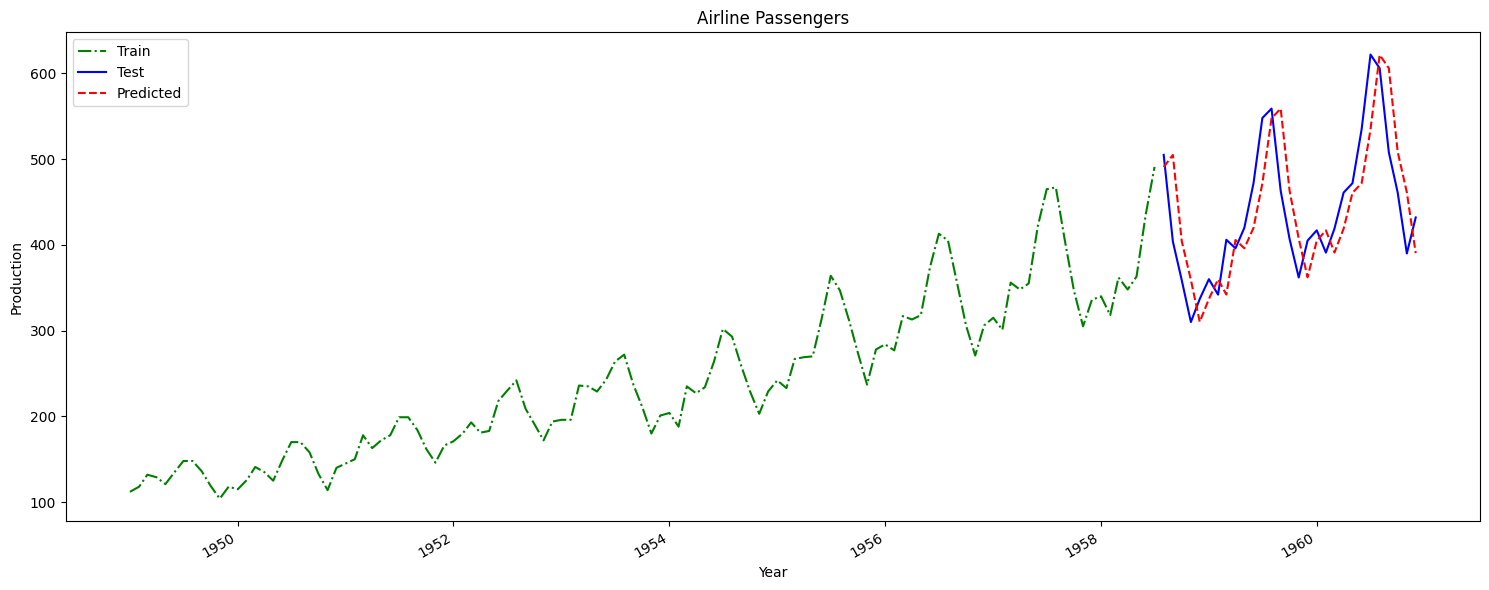

In [52]:
# 5 Ilustrando graficamente o desempenho do modelo de suavização exponencial simples.

fig, ax = plt.subplots()

ax.plot(airline_passengers.index[0:size], train, 'g-.', label='Train')
ax.plot(airline_passengers.index[size:len(X)], test, 'b-', label='Test')
ax.plot(airline_passengers.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year') # Conferir!
ax.set_ylabel('Production') # Conferir!
#ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Airline Passengers")
# plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018]) # <- Conferir!!!

fig.autofmt_xdate()
plt.tight_layout()

#### Base 3 - Modelo ARIMA

In [53]:
# 1. c) Escolhendo um modelo ARIMA.

model = ARIMA(airline_passengers, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = airline_passengers.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                ter, 07 nov 2023   AIC                           1390.135
Time:                        19:45:01   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646      0.071     -0.915      0.3

In [54]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=500.902643, osbervado=505.000000
previsão=495.672712, osbervado=404.000000
previsão=343.735366, osbervado=359.000000
previsão=361.834794, osbervado=310.000000
previsão=303.424622, osbervado=337.000000
previsão=390.436616, osbervado=360.000000
previsão=373.135039, osbervado=342.000000
previsão=341.144954, osbervado=406.000000
previsão=416.666588, osbervado=396.000000
previsão=374.925051, osbervado=420.000000
previsão=431.550888, osbervado=472.000000
previsão=459.671457, osbervado=548.000000
previsão=568.771046, osbervado=559.000000
previsão=541.696619, osbervado=463.000000
previsão=415.026125, osbervado=407.000000
previsão=392.219976, osbervado=362.000000
previsão=365.550227, osbervado=405.000000
previsão=458.449443, osbervado=417.000000
previsão=425.806071, osbervado=391.000000
previsão=383.785947, osbervado=419.000000
previsão=417.446171, osbervado=461.000000
previsão=468.648234, osbervado=472.000000
previsão=471.498326, osbervado=535.000000
previsão=541.455152, osbervado=622

Test MAE: 41.171
Test RMSE: 48.386
Test MAPE: 0.095


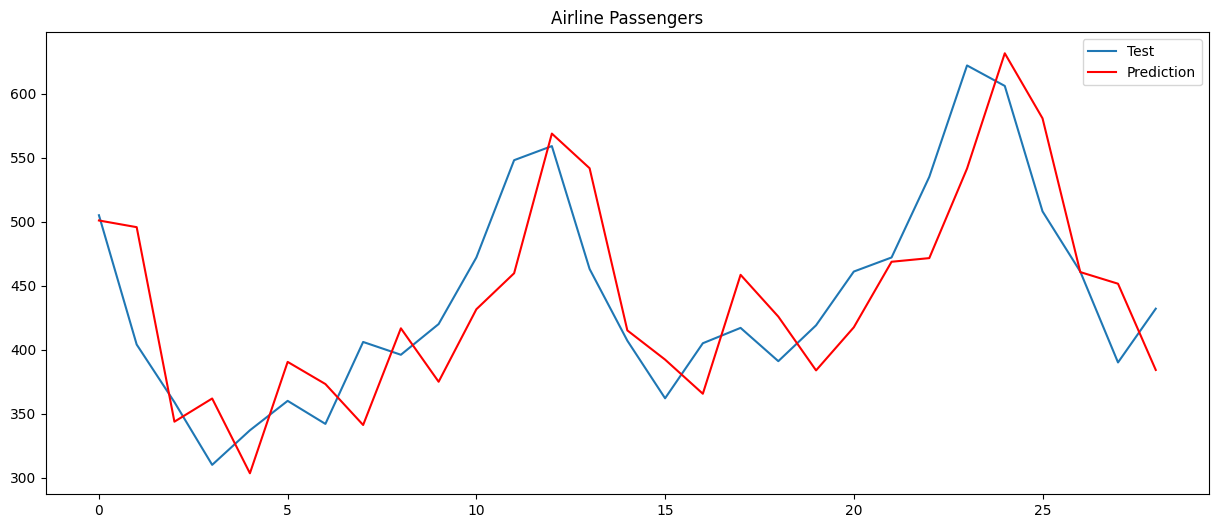

In [55]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Airline Passengers")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

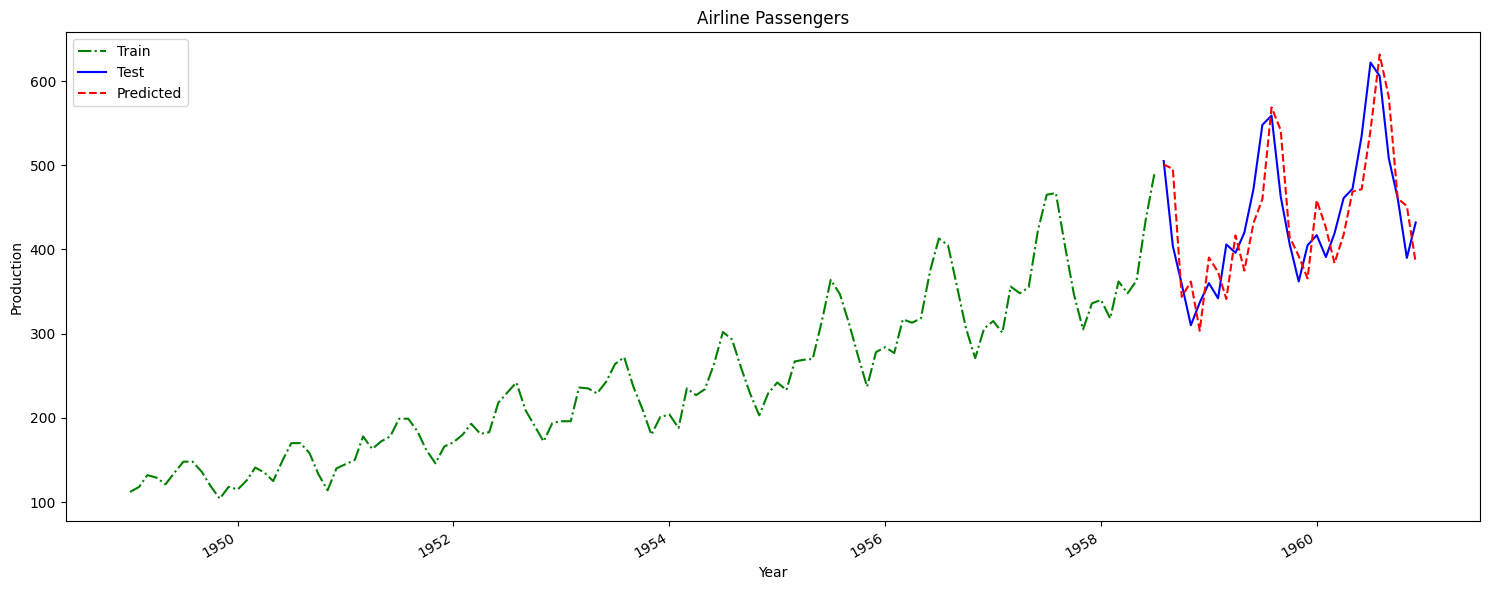

In [56]:
# 5 Ilustrando graficamente o desempenho do modelo ARIMA.

fig, ax = plt.subplots()

ax.plot(airline_passengers.index[0:size], train, 'g-.', label='Train')
ax.plot(airline_passengers.index[size:len(X)], test, 'b-', label='Test')
ax.plot(airline_passengers.index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year') # Conferir!
ax.set_ylabel('Production') # Conferir!
# ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Airline Passengers")
# plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018]) # <- Conferir!!!

fig.autofmt_xdate()
plt.tight_layout()

### Base 4

In [57]:
facebook_price = pd.read_csv('datasets/facebook-historical-stock-price.csv', parse_dates=True, index_col='Date')

In [58]:
facebook_price.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03
mean,124.574938,126.023271,123.076050,124.606725,124.606725,3.209257e+07
std,68.433515,69.242731,67.619477,68.474961,68.474961,2.855388e+07
min,18.080000,18.270000,17.549999,17.730000,17.730000,5.913100e+06
25%,71.080002,71.970001,69.959999,71.290001,71.290001,1.618790e+07
50%,121.389999,122.199997,120.070000,121.220001,121.220001,2.328280e+07
75%,177.949997,179.190002,176.149994,177.639999,177.639999,3.770880e+07
max,300.160004,304.670013,293.049988,303.910004,303.910004,5.735764e+08


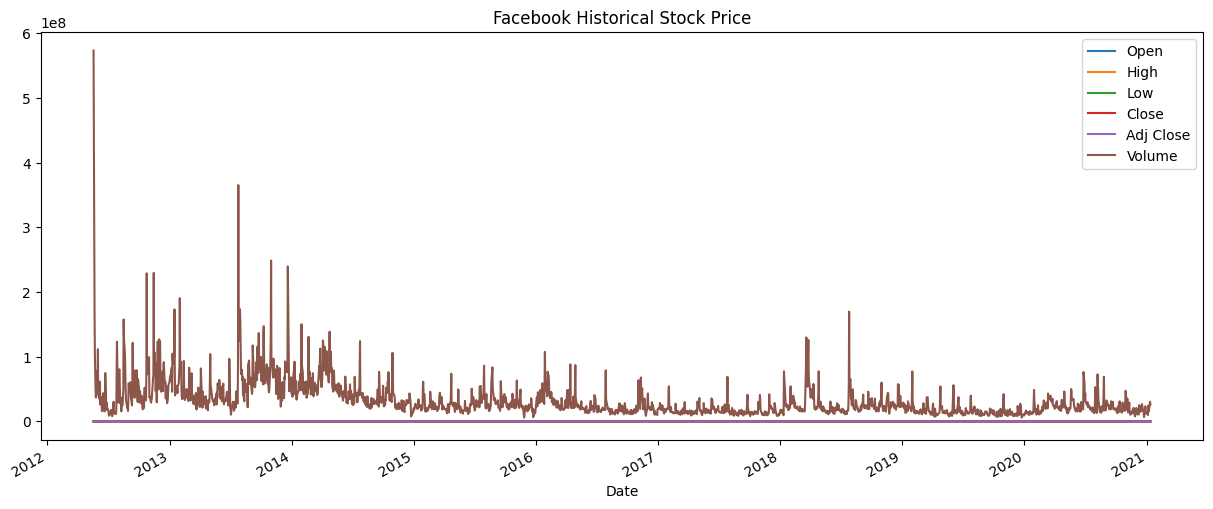

In [59]:
facebook_price.plot(title='Facebook Historical Stock Price')
plt.legend(loc='best')
plt.show()

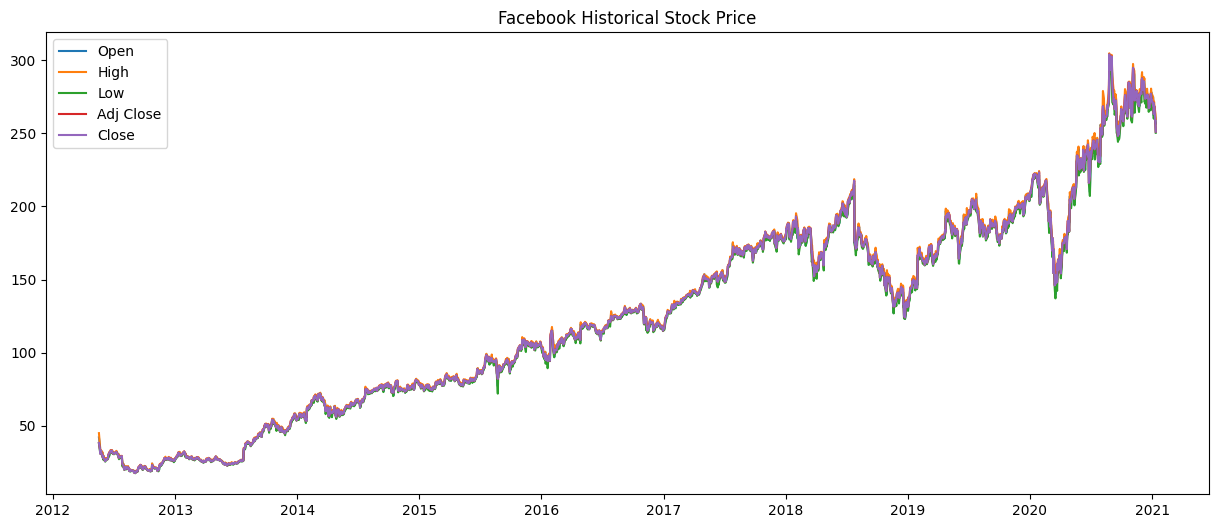

In [60]:
#facebook_price['Open'].plot(title='Facebook Historical Stock Price')
plt.title('Facebook Historical Stock Price')
plt.plot(facebook_price['Open'], label='Open')
plt.plot(facebook_price['High'], label='High')
plt.plot(facebook_price['Low'], label='Low')
plt.plot(facebook_price['Adj Close'], label='Adj Close')
plt.plot(facebook_price['Close'], label='Close')
plt.legend(loc='best')
plt.show()

In [61]:
facebook_price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


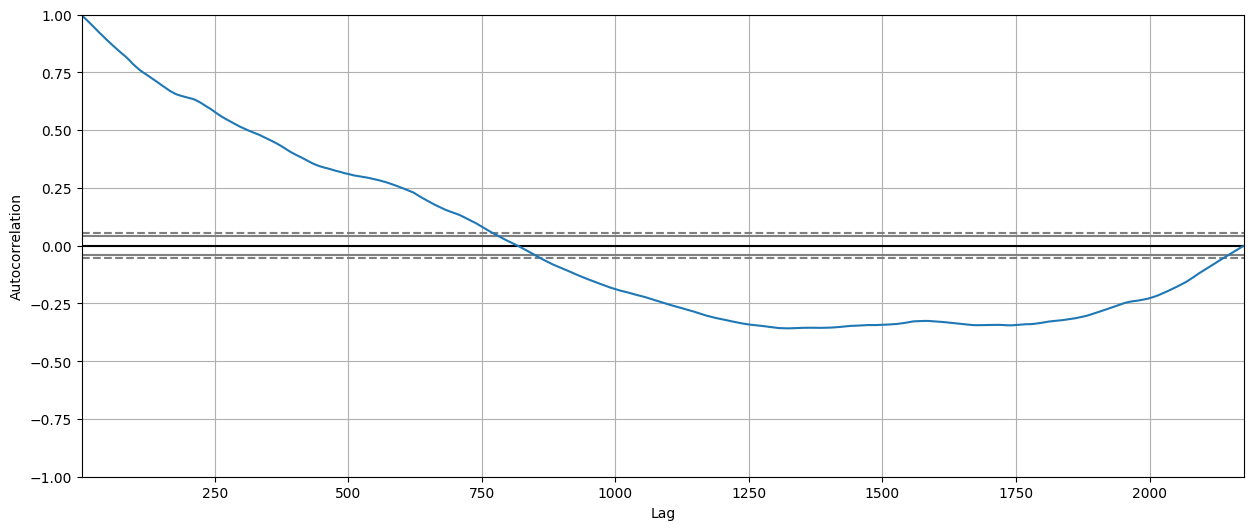

In [62]:
autocorrelation_plot(facebook_price['Close'])
plt.show()

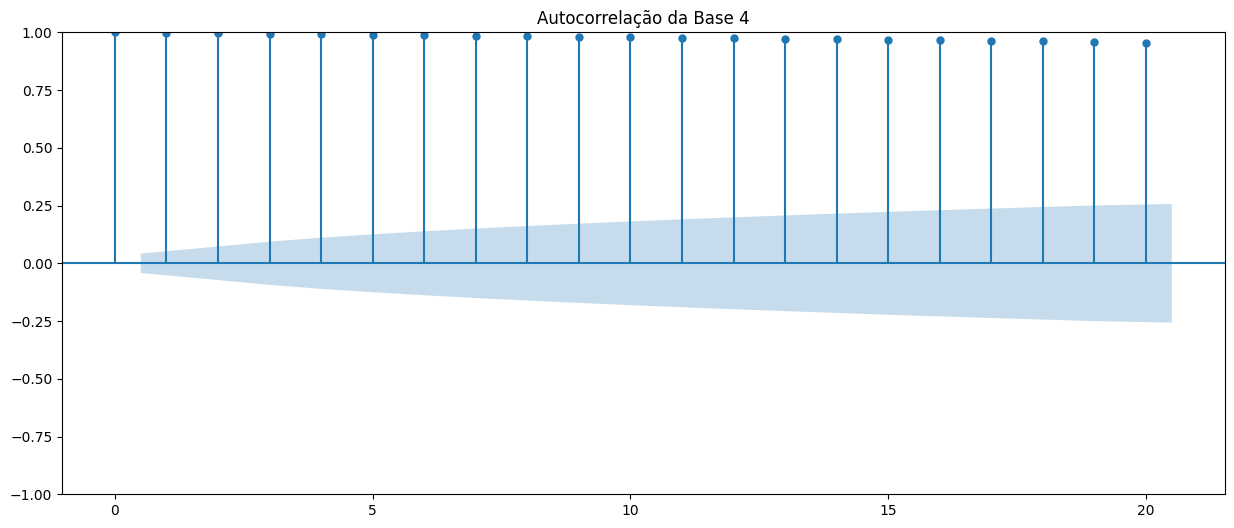

In [63]:
smt.graphics.plot_acf(facebook_price['Close'], lags=20, alpha=0.05, title="Autocorrelação da Base 4")
plt.show()

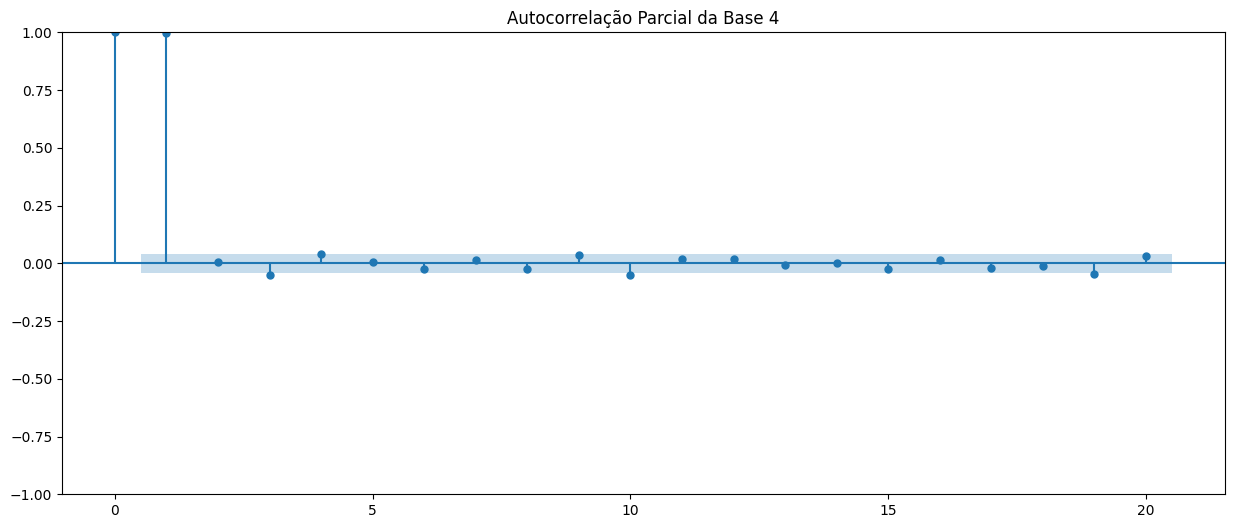

In [64]:
smt.graphics.plot_pacf(facebook_price['Close'], lags=20, alpha=0.05, title="Autocorrelação Parcial da Base 4")
plt.show()

#### Base 4 - Modelo Simples

In [65]:
# 1. Escolhendo um modelo simples: Método da média dos dados históricos.

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = facebook_price['Close'].values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

history = [np.double(x) for x in train]
predictions = []

# 3. Aplicando a previsão aos dados, usando validação cruzada.

for t in range(len(test)):
	yhat = np.mean(history)
	predictions.append(yhat)
	obs = test[t]
	# history.append(np.double(yhat))
	history.append(np.double(obs))
	history = history[-(size):]
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=101.470695, osbervado=183.779999
previsão=101.554296, osbervado=182.580002
previsão=101.639621, osbervado=193.259995
previsão=101.732820, osbervado=191.490005
previsão=101.824428, osbervado=194.779999
previsão=101.917335, osbervado=193.399994
previsão=102.010092, osbervado=193.029999
previsão=102.104400, osbervado=192.529999
previsão=102.198794, osbervado=195.470001
previsão=102.294067, osbervado=193.880005
previsão=102.389506, osbervado=189.770004
previsão=102.483056, osbervado=189.539993
previsão=102.577065, osbervado=188.649994
previsão=102.670023, osbervado=188.339996
previsão=102.763090, osbervado=181.539993
previsão=102.851798, osbervado=180.729996
previsão=102.940092, osbervado=186.270004
previsão=103.031344, osbervado=186.990005
previsão=103.123084, osbervado=185.300003
previsão=103.213268, osbervado=182.720001
previsão=103.300982, osbervado=184.820007
previsão=103.389098, osbervado=185.320007
previsão=103.477214, osbervado=180.869995
previsão=103.562952, osbervado=181

Test MAE: 94.090
Test RMSE: 98.014
Test MAPE: 0.425


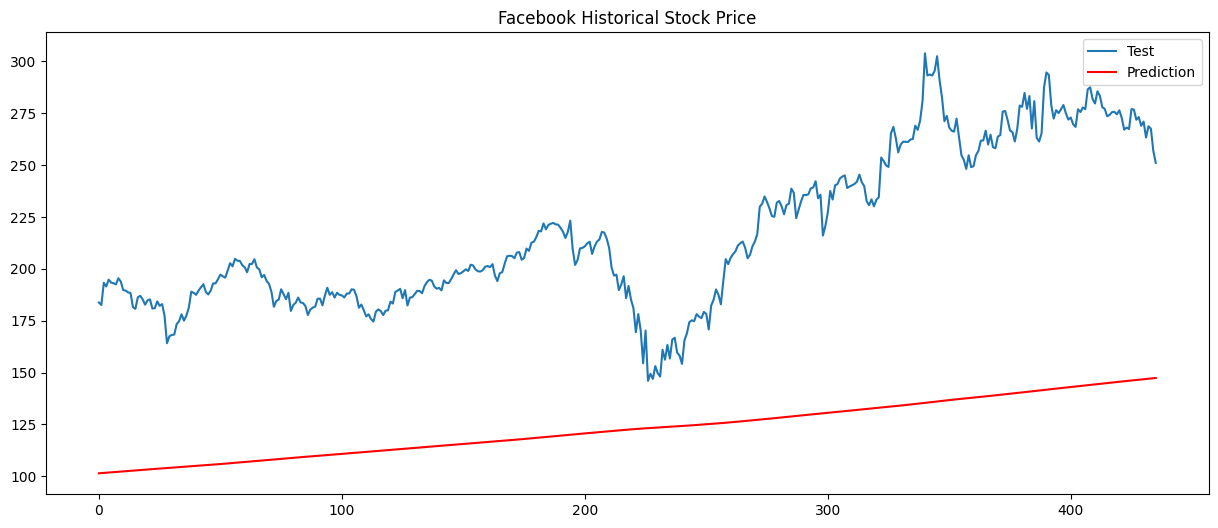

In [66]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

# smape = MeanAbsolutePercentageError(symmetric=True)
# print('Test MAPE: %.3f' % smape(test, predictions))

plt.title("Facebook Historical Stock Price")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

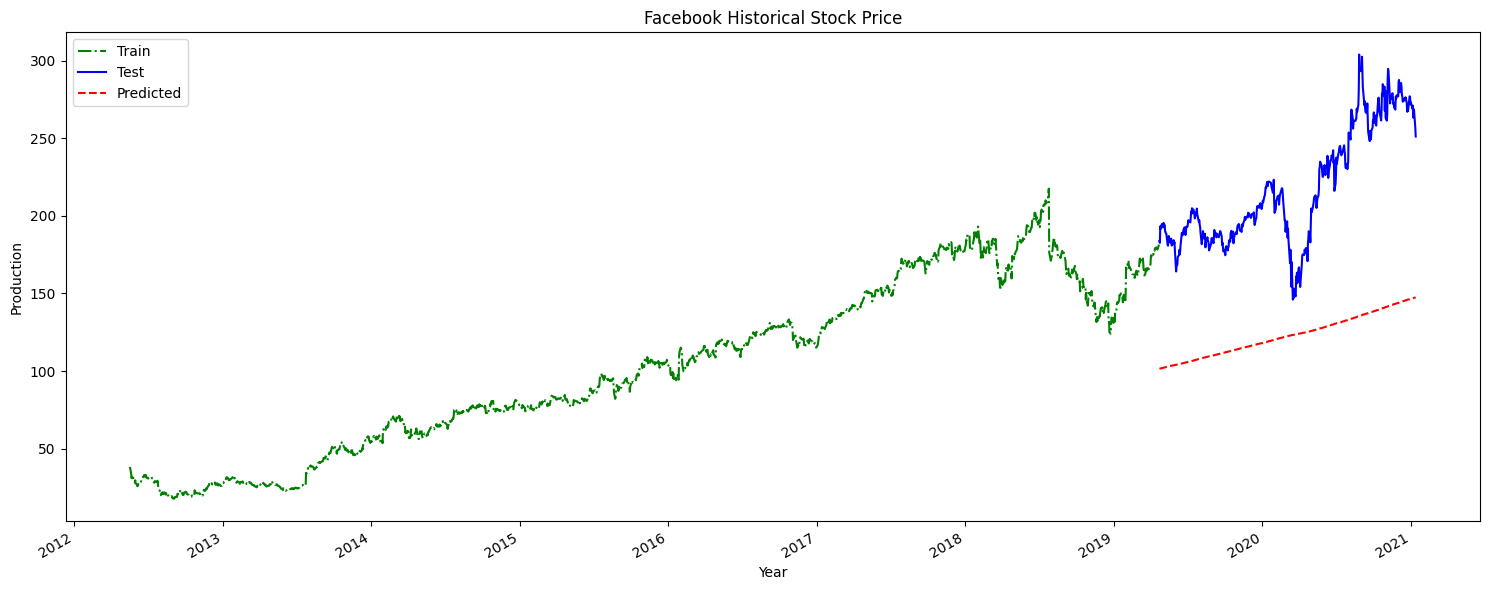

In [67]:
# 5 Ilustrando graficamente o desempenho do modelo simples.

fig, ax = plt.subplots()

ax.plot(facebook_price['Close'].index[0:size], train, 'g-.', label='Train')
ax.plot(facebook_price['Close'].index[size:len(X)], test, 'b-', label='Test')
ax.plot(facebook_price['Close'].index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
#ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Facebook Historical Stock Price")
# 1985 a 2018
#plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
# plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 4 - Modelo de Suavização Exponencial

In [68]:
# 1. b) Escolhendo um modelo de suavização exponencial: Suavização Exponencial Simples.

model = SimpleExpSmoothing(facebook_price['Close'])
model_fit = model.fit()

print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = facebook_price['Close'].values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Close   No. Observations:                 2177
Model:             SimpleExpSmoothing   SSE                          20300.540
Optimized:                       True   AIC                           4864.587
Trend:                           None   BIC                           4875.959
Seasonal:                        None   AICC                          4864.606
Seasonal Periods:                None   Date:                 ter, 07 nov 2023
Box-Cox:                        False   Time:                         19:45:06
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9345277                alpha                 True
initial_level              38.230000                

In [69]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

init = size

for t in range(len(test)):
	model = SimpleExpSmoothing(facebook_price['Close'])
	model_fit = model.fit()
	yhat = model_fit.predict(init, init)
	predictions.append(yhat[0])
	obs = test[t]
	history.append(obs)
	init = init + 1
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=181.235291, osbervado=183.779999
previsão=183.613391, osbervado=182.580002
previsão=182.647660, osbervado=193.259995
previsão=192.565181, osbervado=191.490005
previsão=191.560399, osbervado=194.779999
previsão=194.569204, osbervado=193.399994
previsão=193.476545, osbervado=193.029999
previsão=193.059235, osbervado=192.529999
previsão=192.564649, osbervado=195.470001
previsão=195.279781, osbervado=193.880005
previsão=193.971652, osbervado=189.770004
previsão=190.045095, osbervado=189.539993
previsão=189.573063, osbervado=188.649994
previsão=188.710429, osbervado=188.339996
previsão=188.364249, osbervado=181.539993
previsão=181.986793, osbervado=180.729996
previsão=180.812281, osbervado=186.270004
previsão=185.912674, osbervado=186.990005
previsão=186.919470, osbervado=185.300003
previsão=185.406033, osbervado=182.720001
previsão=182.895862, osbervado=184.820007
previsão=184.694029, osbervado=185.320007
previsão=185.279023, osbervado=180.869995
previsão=181.158664, osbervado=181

Test MAE: 3.608
Test RMSE: 5.199
Test MAPE: 0.017


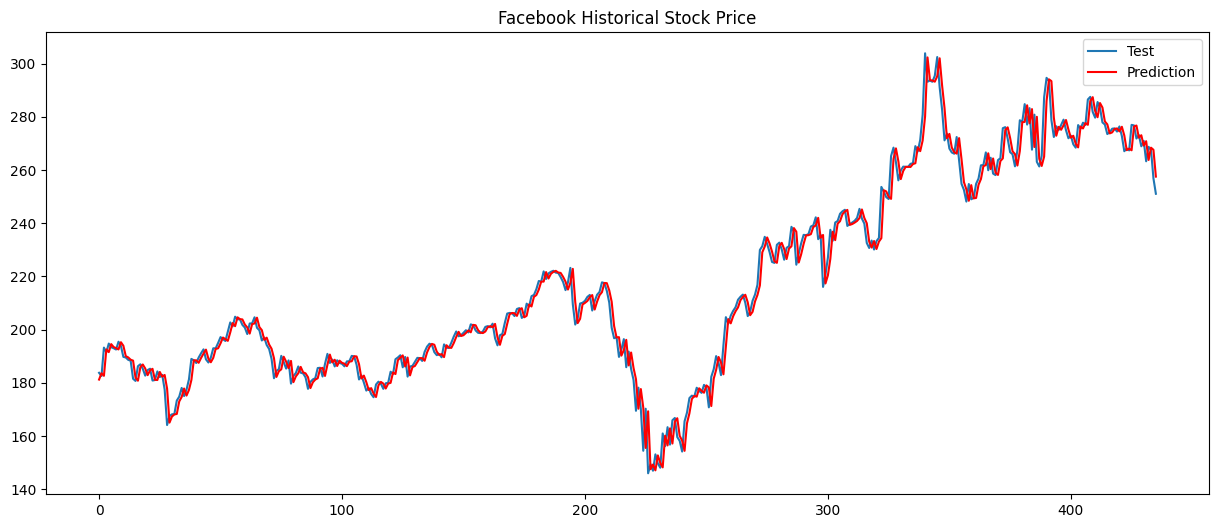

In [70]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Facebook Historical Stock Price")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

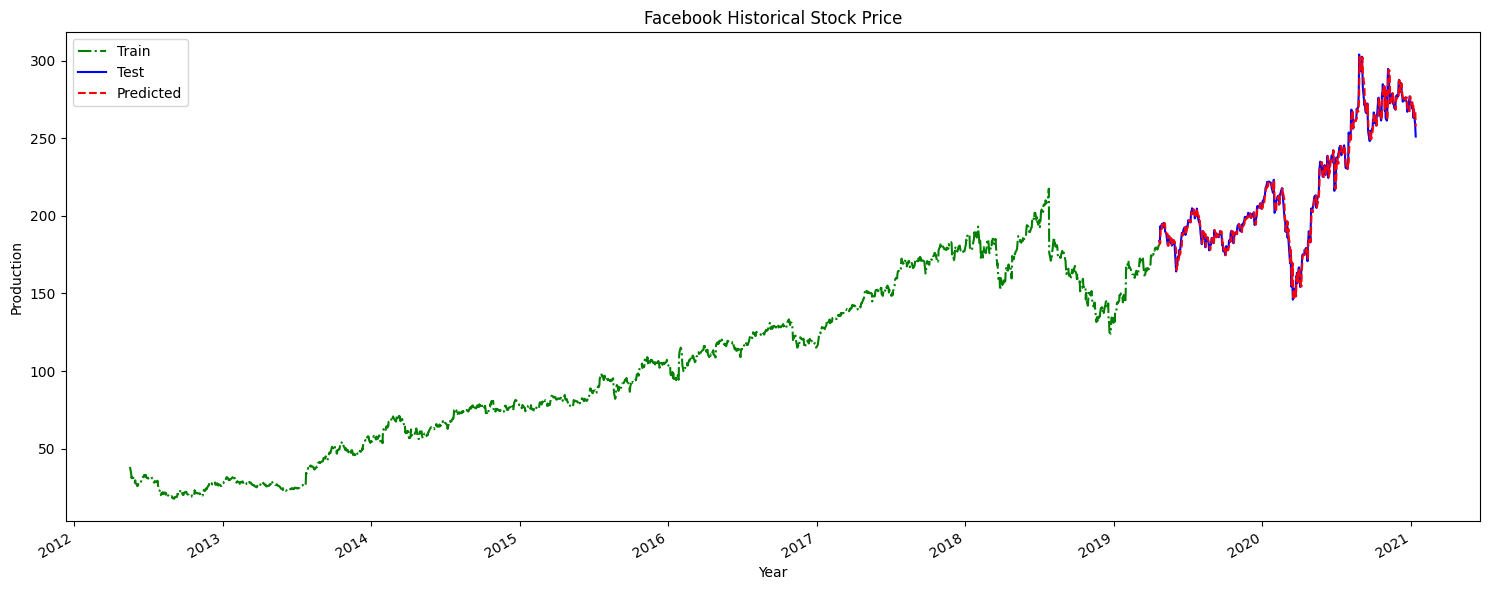

In [71]:
# 5 Ilustrando graficamente o desempenho do modelo de suavização exponencial.

fig, ax = plt.subplots()

ax.plot(facebook_price['Close'].index[0:size], train, 'g-.', label='Train')
ax.plot(facebook_price['Close'].index[size:len(X)], test, 'b-', label='Test')
ax.plot(facebook_price['Close'].index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
#ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Facebook Historical Stock Price")
# 1985 a 2018
#plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
# plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()

#### Base 4 - Modelo ARIMA

In [72]:
# 1. c) Escolhendo um modelo ARIMA.

model = ARIMA(facebook_price['Close'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

# 2. Separando a base de dados em treinamento e teste, na proporção de 80% para 20%.

X = facebook_price['Close'].values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2177
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5507.690
Date:                ter, 07 nov 2023   AIC                          11027.379
Time:                        19:45:11   BIC                          11061.491
Sample:                             0   HQIC                         11039.851
                               - 2177                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0628      0.012     -5.425      0.000      -0.085      -0.040
ar.L2          0.0120      0.012      1.001      0.317      -0.011       0.035
ar.L3         -0.0888      0.013     -6.611      0.0

In [73]:
print(f'{len(X) - size}')

436


In [74]:
# 3. Aplicando a previsão aos dados, usando validação cruzada.

history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('previsão=%f, osbervado=%f' % (yhat, obs))

previsão=181.415708, osbervado=183.779999
previsão=183.738532, osbervado=182.580002
previsão=182.462337, osbervado=193.259995
previsão=193.145360, osbervado=191.490005
previsão=191.056868, osbervado=194.779999
previsão=194.457114, osbervado=193.399994
previsão=193.294986, osbervado=193.029999
previsão=192.432051, osbervado=192.529999
previsão=192.618363, osbervado=195.470001
previsão=195.294399, osbervado=193.880005
previsão=193.933400, osbervado=189.770004
previsão=189.809824, osbervado=189.539993
previsão=189.649369, osbervado=188.649994
previsão=188.612315, osbervado=188.339996
previsão=188.511793, osbervado=181.539993
previsão=181.855156, osbervado=180.729996
previsão=180.898044, osbervado=186.270004
previsão=186.431619, osbervado=186.990005
previsão=186.962877, osbervado=185.300003
previsão=185.551252, osbervado=182.720001
previsão=182.755436, osbervado=184.820007
previsão=184.613206, osbervado=185.320007
previsão=185.298842, osbervado=180.869995
previsão=180.959007, osbervado=181

Test MAE: 3.627
Test RMSE: 5.218
Test MAPE: 0.017


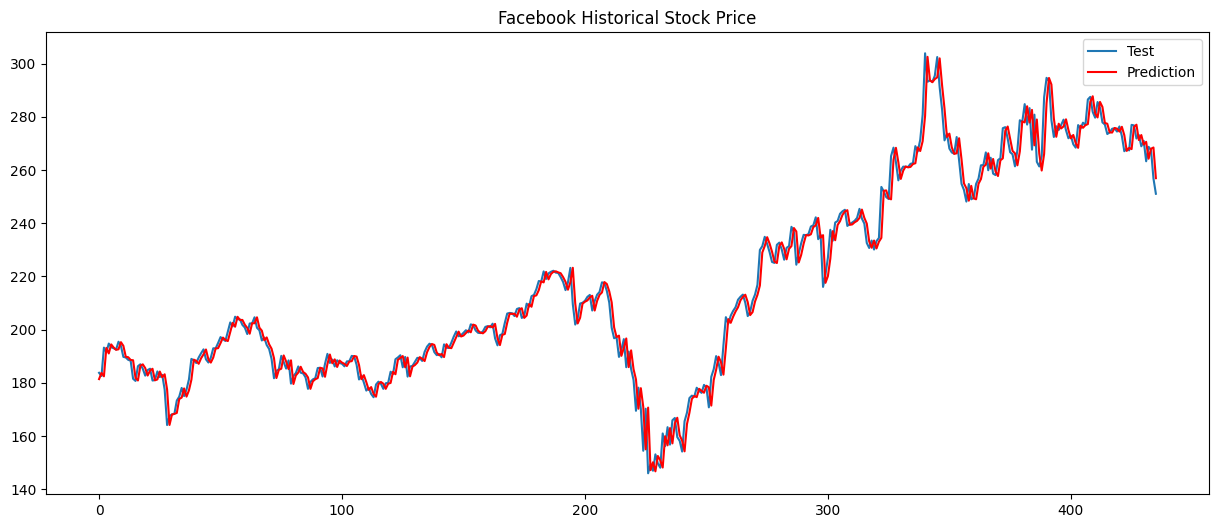

In [75]:
# 4. Medindo o desempenho do modelo a partir das métricas: MAE, RMSE e MAPE

mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

mape = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % mape)

plt.title("Facebook Historical Stock Price")
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Prediction')
plt.legend(loc='best')
plt.show()

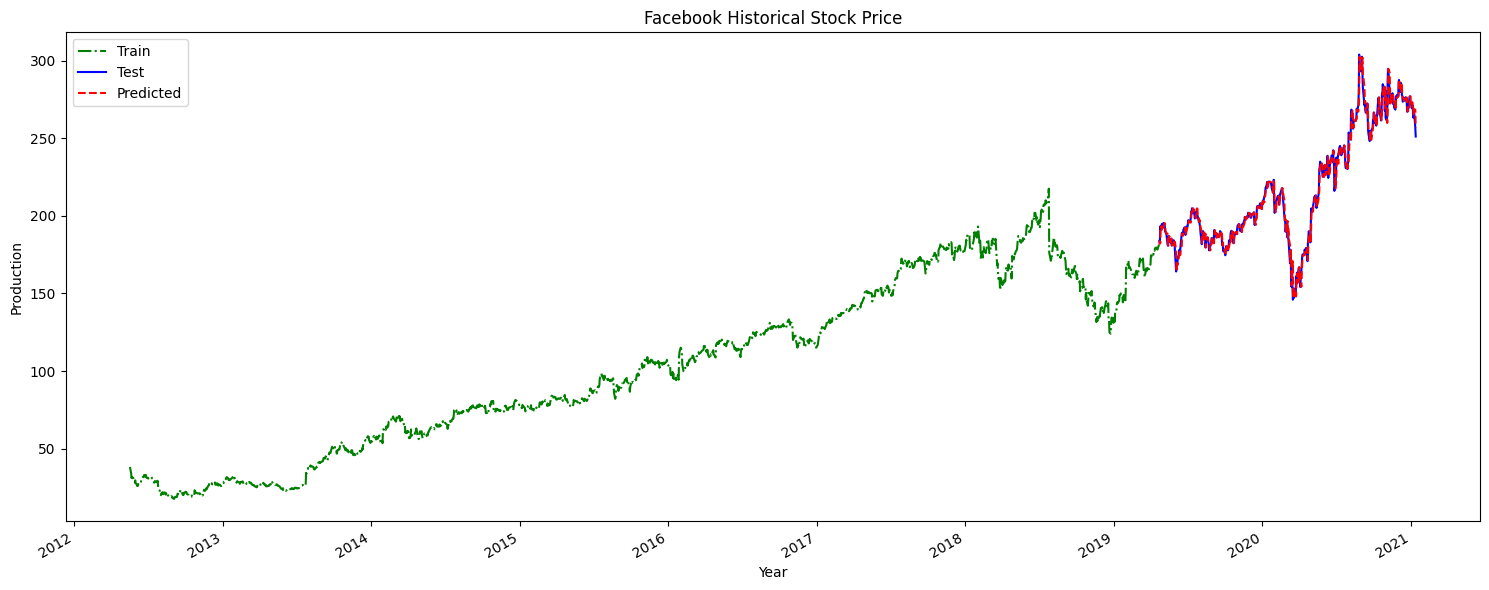

In [76]:
# 5 Ilustrando graficamente o desempenho do modelo ARIMA.

fig, ax = plt.subplots()

ax.plot(facebook_price['Close'].index[0:size], train, 'g-.', label='Train')
ax.plot(facebook_price['Close'].index[size:len(X)], test, 'b-', label='Test')
ax.plot(facebook_price['Close'].index[size:len(X)], predictions, 'r--', label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Production')
#ax.axvspan(317, 396, color='#808080', alpha=0.2) # zona cinza
ax.legend(loc='best')
plt.title("Facebook Historical Stock Price")
# 1985 a 2018
#plt.xticks(np.arange(0, 396, 33), [1985, 1988, 1991, 1994, 1997, 2000, 2003, 2006, 2009, 2012, 2015, 2018])
# plt.xticks(np.arange(0, 36, 2), [1901, 'mar', 'mai', 'jul', 'sep', 'nov', 1902, 'mar', 'mai', 'jul', 'sep', 'nov', 1903, 'mar', 'mai', 'jul', 'sep', 'nov'])

fig.autofmt_xdate()
plt.tight_layout()